# Alejandro Lopez Dominguez

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1. Loading Data

First we are going to use pandas for read the datasets.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


breed_labels = pd.read_csv("breed_labels.csv")
color_labels = pd.read_csv("color_labels.csv")
petfinder_data = pd.read_csv("PetFinder_dataset.csv")
state_labels = pd.read_csv("state_labels.csv")


## 0.2. Understanding Data

1. Load the main dataset (`PetFinder_dataset.csv`) into a DataFrame named `petfinder_data`.
2. Print metadata about each dataset (`breed_labels`, `color_labels`, `state_labels`) using `.info()`. This shows:
   - Column names.
   - Data types.
   - Number of non-null entries per column.
3. Identify missing values in `petfinder_data` by using `.isnull().sum()`.

In [28]:

print(breed_labels.info())

print(color_labels.info())

print(petfinder_data.info())

print(state_labels.info())

print(petfinder_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BreedID    307 non-null    int64 
 1   Type       307 non-null    int64 
 2   BreedName  307 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ColorID    7 non-null      int64 
 1   ColorName  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 

1. **`breed_labels`:**
   - Contains 3 columns: `BreedID` (integer), `Type` (integer), and `BreedName` (string).
   - No missing values.

2. **`color_labels`:**
   - Contains 2 columns: `ColorID` (integer) and `ColorName` (string).
   - No missing values.

3. **`petfinder_data`:**
   - Main dataset with 14993 entries and 24 columns.
   - Key observations:
     - **`Name`** has 1265 missing entries.
     - **`Description`** has 13 missing entries.
     - All other columns are complete with no missing values.
     - The dataset includes a mix of numeric (`int64`, `float64`) and categorical (`object`) data.

4. **`state_labels`:**
   - Contains 2 columns: `StateID` (integer) and `StateName` (string).
   - No missing values.

5. **Missing Values Summary:**
   - The `Name` and `Description` columns contain missing values.
   - Other columns are complete and ready for processing.


---


This cell generates a statistical summary of all numerical columns in the `petfinder_data` DataFrame using the `.describe()` method.

In [29]:
print(petfinder_data.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

 
   - `Age`: Ranges from 0 to 255, with a mean of approximately 10.45. The wide range indicates variability in pet ages.
   - `Fee`: The adoption fee ranges from 0 to 3000, with a mean of 21.26. Most pets likely have no adoption fee (75th percentile is 0).
   - `AdoptionSpeed`: Ranges from 0 to 4, with a mean of 2.51. This indicates the distribution of adoption speed categories.
   - `PhotoAmt`: The number of photos ranges from 0 to 30, with a mean of 3.89, suggesting some listings may lack visual information.
   - Columns like `Vaccinated`, `Dewormed`, and `Sterilized` are ordinal with clear categories, but they are represented numerically.

---

1. Drop irrelevant columns from the dataset:
   - `RescuerID`: Identifier of the rescuer, irrelevant for prediction.
   - `PetID`: Unique identifier for each pet, which does not contribute to predictive modeling.

2. Use `.drop()` to remove these columns from the DataFrame (`petfinder_data`) and ensure the operation is applied in-place using `inplace=True`.

3. Use `.info()` to confirm that the columns have been successfully removed and to check the current structure of the dataset.

In [30]:
columns_drop = ['RescuerID', 'PetID']
petfinder_data.drop(columns=columns_drop, inplace=True)

petfinder_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  VideoA

---

This cell performs preprocessing on the `Name` and `Description` columns of the dataset by converting their text data into numerical values representing their lengths. Missing values are replaced with `0` to handle incomplete data effectively.

In [31]:
name_length = []

for name in petfinder_data['Name']:
    if pd.isnull(name) or name == 'No Name':
        name_length.append(0)
    else:
        name_length.append(len(name))

petfinder_data['Name'] = name_length

description_length = []

for description in petfinder_data['Description']:
    if pd.isnull(description):
        description_length.append(0)
    else:
        description_length.append(len(description))

petfinder_data['Description'] = description_length


---

1. This cell calculates the Pearson correlation coefficient between the target variable `AdoptionSpeed` and all other columns in the dataset.
The correlation is computed using `.corr()` for each column.
2. Prints the name of each column alongside its correlation value with `AdoptionSpeed`.

In [32]:
columns = petfinder_data.columns

for i in range(len(columns)-1):
    print(columns[i], "correlation")
    print(petfinder_data["AdoptionSpeed"].corr(petfinder_data[columns[i]]))

Type correlation
-0.0912400842343042
Name correlation
-0.008573757753383216
Age correlation
0.10050993288307597
Breed1 correlation
0.10783385983819035
Breed2 correlation
-0.0186423529144438
Gender correlation
0.05762159265167737
Color1 correlation
-0.04419208322944413
Color2 correlation
-0.038579274730679895
Color3 correlation
-0.007014076835845117
MaturitySize correlation
0.045652562021073824
FurLength correlation
-0.09133701350260878
Vaccinated correlation
-0.059042748757928074
Dewormed correlation
-0.013209692026590706
Sterilized correlation
-0.08344675516194175
Health correlation
0.029381709238661353
Quantity correlation
0.06293148455672996
Fee correlation
-0.004016734373472537
State correlation
0.013119432570419007
VideoAmt correlation
-0.0005714066121578465
Description correlation
-0.010078735881239163
PhotoAmt correlation
-0.02323312455280586


1. **Weak correlations overall:**
   - Most features show weak correlation (absolute values close to 0) with `AdoptionSpeed`.
   - This suggests that no single feature has a strong linear relationship with the target variable.

2. **Key correlations:**
   - **Positive correlations:**
     - `Age` (0.10): Older pets are slightly more likely to have certain adoption speeds.
     - `Breed1` (0.11): Primary breed shows some influence on adoption speed.
   - **Negative correlations:**
     - `Type` (-0.09): Indicates a weak difference in adoption speed between cats and dogs.
     - `FurLength` (-0.09): Slightly suggests that pets with longer fur may have slower adoption speeds.
     - `Sterilized` (-0.08): Pets that are sterilized show a weak tendency towards slower adoption.

3. **Features with near-zero correlation:**
   - `Fee` (-0.004): Adoption fees seem to have minimal linear impact on adoption speed.
   - `PhotoAmt` (-0.023): Number of photos has little correlation with adoption speed, though it could still have non-linear effects.
   - `VideoAmt` (-0.00057): Videos appear irrelevant in determining adoption speed.

---

This cell calculates and prints the percentage distribution of unique values for every column in the dataset.
  - Helps in analyzing how values are distributed across different features.
  - Useful for identifying imbalanced data or common patterns in categorical and numerical columns.
  - Can guide the choice of preprocessing techniques, such as encoding infrequent categories or rescaling data.



In [33]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
for c in columns.values:
    print(petfinder_data[c].value_counts(normalize=True) * 100)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


Type
1    54.238645
2    45.761355
Name: proportion, dtype: float64
Name
5     17.254719
4     13.106116
6     12.132328
0      8.797439
7      7.290069
9      3.921830
8      3.621690
3      3.014740
11     2.948042
10     2.614553
12     2.414460
14     2.127660
13     2.080971
15     1.834189
16     1.740812
17     1.467351
2      1.267258
19     1.147202
20     1.147202
18     1.127193
21     0.953778
23     0.887081
22     0.880411
25     0.693657
35     0.586941
24     0.580271
27     0.493564
26     0.486894
32     0.446875
33     0.420196
34     0.413526
30     0.406857
31     0.406857
28     0.380177
29     0.346829
1      0.173414
40     0.106716
37     0.106716
39     0.060028
38     0.040019
36     0.040019
45     0.013340
44     0.006670
47     0.006670
42     0.006670
Name: proportion, dtype: float64
Age
2      23.364237
1      15.367171
3      13.112786
4       7.396785
12      6.449677
         ...    
85      0.006670
88      0.006670
43      0.006670
238     0.006670




Type
- **Proportions**: 
  - `1`: 54.24% (Dogs)
  - `2`: 45.76% (Cats)
- The dataset is relatively balanced between dogs and cats, ensuring representation for both groups during analysis or modeling.

Name
- **Proportions**:
  - Names with 5 characters: 17.25%
  - Names with 4 characters: 13.10%
  - No name (value `0`): 8.43%

Age
- **Proportions**:
  - `2` month: 23.36%
  - `1` month: 15.37%
  - `3` month: 13.11%
- Most pets in the dataset are young, with ages clustered around 1-3 months, potentially impacting adoption speed as younger pets are often adopted faster.

Breed1
- **Proportions**:
  - `307`: 39.53%
  - `266`: 24.24%
  - `265`: 8.39%
- Some breeds dominate the dataset, such as breed `307` (mixed breed acording breed_labels), which represents the largest proportion.


Breed2
- **Proportions**:
  - `0`: 71.78% (No secondary breed)
  - `307`: 11.51%
  - `266`: 3.99%
- Most pets have no secondary breed listed, indicating they may be purebred.


Gender
- **Proportions**:
  - Male (`2`): 48.54%
  - Female (`1`): 36.92%
  - Mixed/Unknown (`3`): 14.54%
- Males slightly outnumber females, with some pets having mixed gender classification.


Color1, Color2, Color3
- **Proportions**:
  - Primary color (`Color1`) `1`: 49.54%
  - Secondary color (`Color2`) `0`: 29.82% (No secondary color)
  - Tertiary color (`Color3`) `0`: 70.73% (No tertiary color)
- Pets often have a single dominant color, with fewer secondary or tertiary color designations.


MaturitySize
- **Proportions**:
  - Medium (`2`): 68.73%
  - Small (`1`): 22.64%
- Most pets are medium-sized, likely influencing preferences for adopters.


FurLength
- **Proportions**:
  - Short (`1`): 58.75%
  - Medium (`2`): 35.76%
- Short fur is the most common, potentially affecting maintenance preferences during adoption.


Vaccinated, Dewormed, Sterilized
- **Proportions**:
  - Vaccinated (`2`): 48.20%
  - Dewormed (`1`): 56.00%
  - Sterilized (`2`): 67.21%
- Vaccination and sterilization rates are high, which is crucial for health and adoption processes.


Health
- **Proportions**:
  - Healthy (`1`): 96.57%
- Most pets are reported to be in good health, facilitating faster adoptions.


Quantity
- **Proportions**:
  - Single pet (`1`): 77.14%
- The majority of entries represent single animals rather than groups.


Fee
- **Proportions**:
  - No fee (`0`): 84.46%
- Most pets are listed with no adoption fee, which may increase adoption.


State
- **Proportions**:
  - State `41326`: 58.12%
  - State `41401`: 25.65%
- Adoptions are concentrated in a few states, suggesting geographic influence on pet availability.


VideoAmt
- **Proportions**:
  - No videos (`0`): 96.17%
- Most entries lack videos. Probably this feature is irrelevant.


Description
- Lengths vary significantly, with many falling between 12-14 words. This might correlate with how appealing or informative the pet’s profile is.


PhotoAmt
- **Proportions**:
  - `1.0` photo: 20.51%
  - `2.0` photos: 16.79%
- Photos are essential for adoption listings, with most profiles including 1-3 photos.


AdoptionSpeed
- **Proportions**:
  - `4` (Slow): 27.99%
  - `2` (Medium): 26.93%
  - `3` (Fast): 21.74%
  - `1` (Very Fast): 20.61%
- The dataset includes a range of adoption speeds, but slower adoptions are slightly more common.


---

This cell processes the `Breed2` column to create a binary classification indicating whether a pet is of mixed breed (`1`) or not (`0`). It achieves this by checking if `Breed1` is 307 (mixed breed acording to breed labels) or if `Breed2` has a non-zero value. The resulting column provides a simplified representation of breed information, which can be useful for analysis and modeling.

In [34]:
mixed = []
breed1 = petfinder_data['Breed1'].values
breed2 = petfinder_data['Breed2'].values

for i in range(len(breed1)):
    if breed1[i] == 307 or breed2[i] != 0:
        mixed.append(1)  
    else:
        mixed.append(0)  
petfinder_data['Breed2'] = mixed


print(petfinder_data['Breed2'].value_counts())

Breed2
1    8766
0    6227
Name: count, dtype: int64


---

The nexts cells generates bar plots for each categorical column in the dataset to analyze the distribution of `AdoptionSpeed` across their respective categories. These plots are useful for identifying patterns or trends that can inform feature selection or preprocessing decisions for the machine learning model.

Due to the nature of numerical variables such as age, we will not analyze them using a graph. However, we have already examined their correlations with AdoptionSpeed.


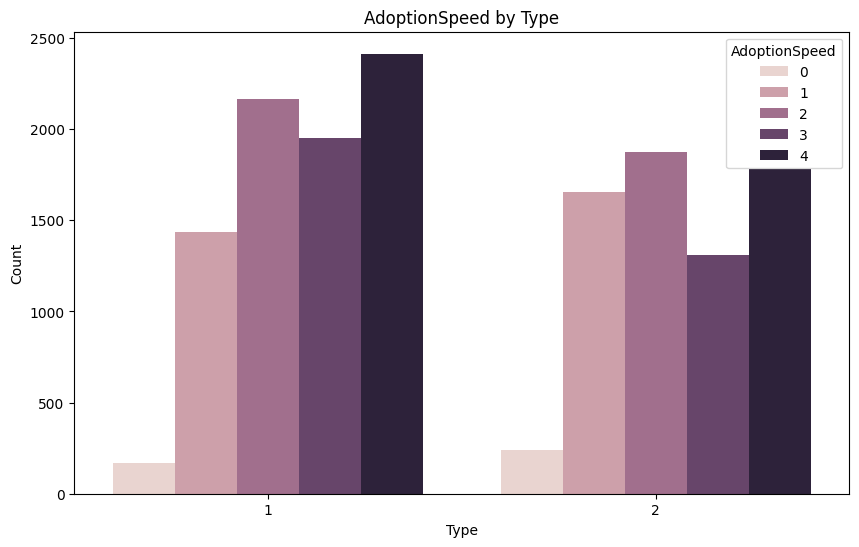

In [35]:
import seaborn as sns

def plot_columns(petfinder_data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=petfinder_data, x=column, hue='AdoptionSpeed')
    plt.title(f'AdoptionSpeed by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='AdoptionSpeed')
    plt.show()

plot_columns(petfinder_data, 'Type')


- **Type 1 (Dogs):** The most common AdoptionSpeed is `3`, followed by `2` and `4`, indicating that dogs tend to be adopted with moderate speed.
- **Type 2 (Cats):** The most common AdoptionSpeed is also `3`, but AdoptionSpeed `2` and `4` are slightly lower compared to dogs.

This plot shows that both dogs and cats share a similar distribution of AdoptionSpeed, but cats appear slightly less frequently in the slower adoption categories (`0` and `1`).


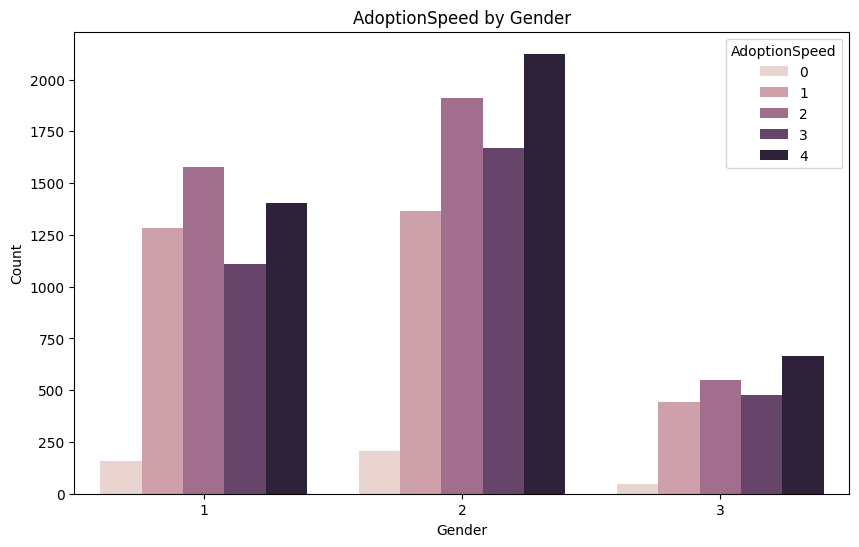

In [36]:
plot_columns(petfinder_data, 'Gender')

- **Gender 1 (Male):** AdoptionSpeed `3` is the most frequent, followed by `2` and `4`. Males show a preference toward moderate and slower adoption speeds.
- **Gender 2 (Female):** AdoptionSpeed `4` is the most frequent, followed by `3` and `2`. Females are more likely to experience slower adoption speeds.
- **Gender 3 (Mixed):** This group is much smaller in size, with a fairly even distribution across AdoptionSpeeds `2`, `3`, and `4`.

This plot highlights that females (Gender 2) tend to have slightly slower adoption speeds compared to males (Gender 1), with Gender 3 being too small for clear trends.

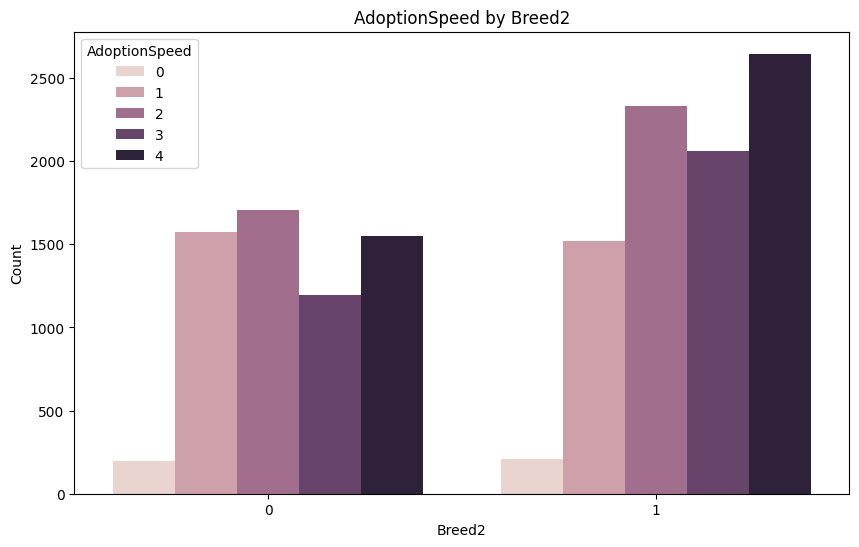

In [37]:
plot_columns(petfinder_data, 'Breed2')

- **Breed2 = 0 (Not Mixed):** AdoptionSpeed `2` is the most common, followed by `3` and `4`. Non-mixed breeds tend to be adopted at moderate speeds.
- **Breed2 = 1 (Mixed):** AdoptionSpeed `4` is the most common, meaning that slower adoption speeds are generally more common for mixed breeds.

We can see that non-mixed pets have faster adoptions rates.


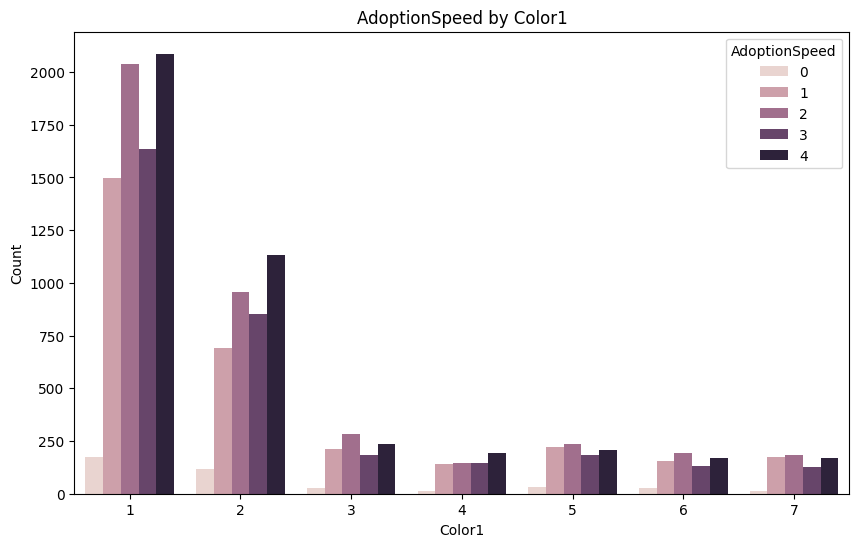

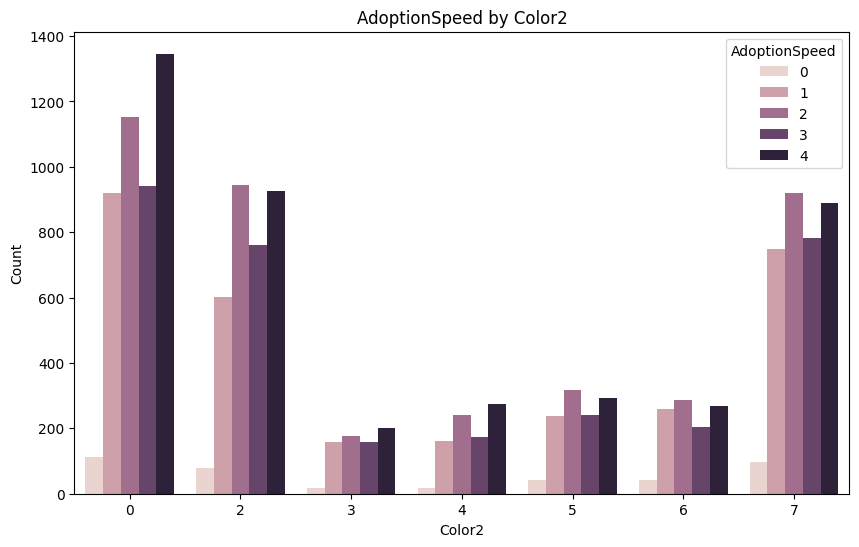

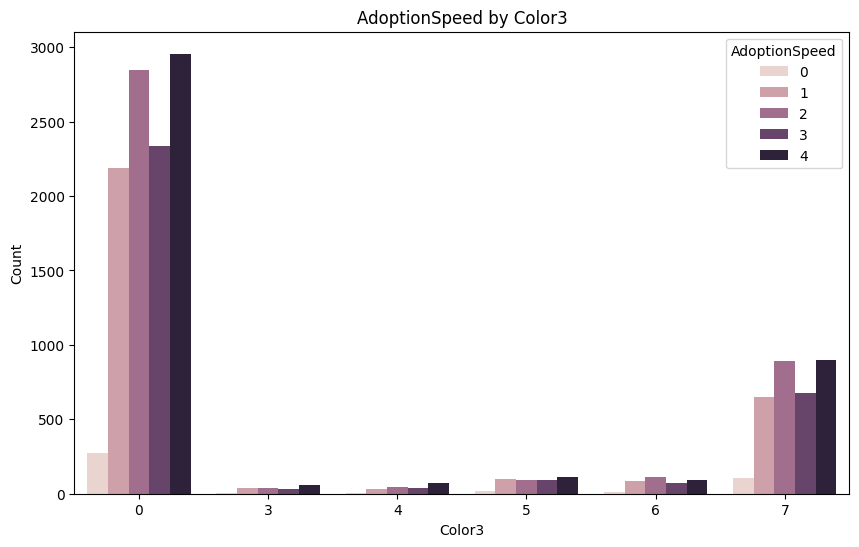

In [38]:
plot_columns(petfinder_data, 'Color1')
plot_columns(petfinder_data, 'Color2')
plot_columns(petfinder_data, 'Color3')

**Color1**:
- The majority of pets fall under `Color1=1` and `Color1=2`.
- AdoptionSpeed `4` dominates for both colors.
- For less frequent Color1 categories, the distribution of AdoptionSpeed flattens, with no clear pattern.

**Color2**:
- Pets without a secondary color (`Color2=0`) are the most common, followed by `Color2=7` and `Color2=2`.
- For `Color2=0`, AdoptionSpeed `4` is again most prevalent.
- For almost all the other colors, AdoptionSpeed `2` is the most common.

**Color3**:
- A significant number of pets have no third color (`Color3=0`).
- Among those with `Color3=7`, AdoptionSpeed `4` and `3` are dominant.
- Similar to other color categories, the less frequent values have mixed adoption speeds.

Color attributes are likely influential in adoption speed, with specific colors correlating with faster adoptions.


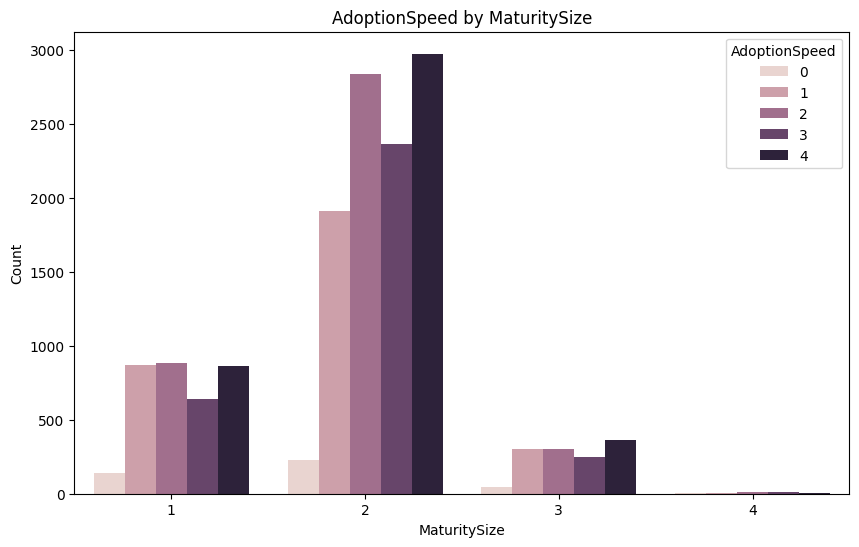

In [39]:
plot_columns(petfinder_data, 'MaturitySize')

- **MaturitySize=2 (Medium)** has the highest count, with AdoptionSpeed `4` (fast adoption) being the most frequent.
- **MaturitySize=1 (Small)** also shows a significant count, where AdoptionSpeed `1` and `2` dominates.
- Larger sizes (**MaturitySize=3 or 4**) are far less common, with more balanced distributions across AdoptionSpeed categories.

Small pets are more frequently adopted, especially at faster rates. This could indicate a preference for pets that are easier to manage in terms of space or care.

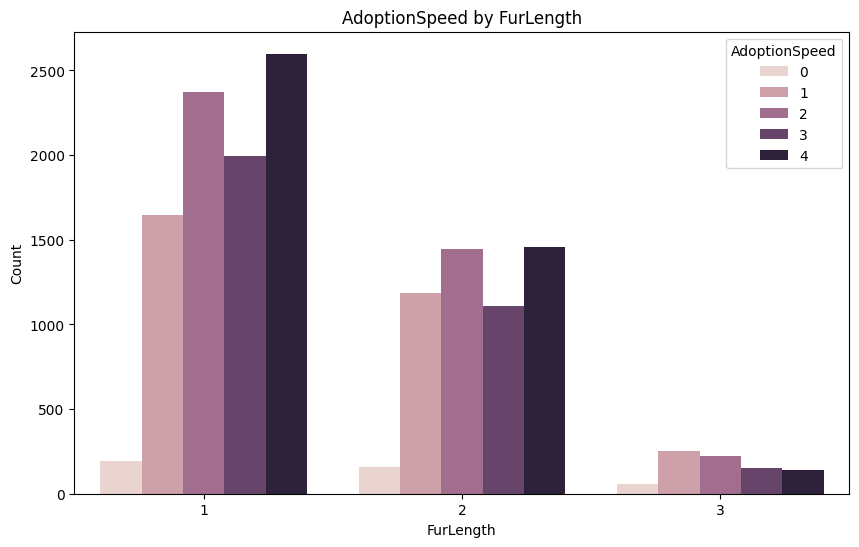

In [40]:
plot_columns(petfinder_data, 'FurLength')

- **FurLength=1 (Short fur)** has the highest adoption counts, with AdoptionSpeed `4` being the most frequent.
- **FurLength=2 (Medium fur)** follows, showing a faster AdoptionSpeed rate but with fewer counts overall.
- **FurLength=3 (Long fur)** has significantly fewer occurrences, with a faster AdoptionSpeed rate, dominating AdoptionSpeed `1`.

Pets with short fur are adopted at faster rates.


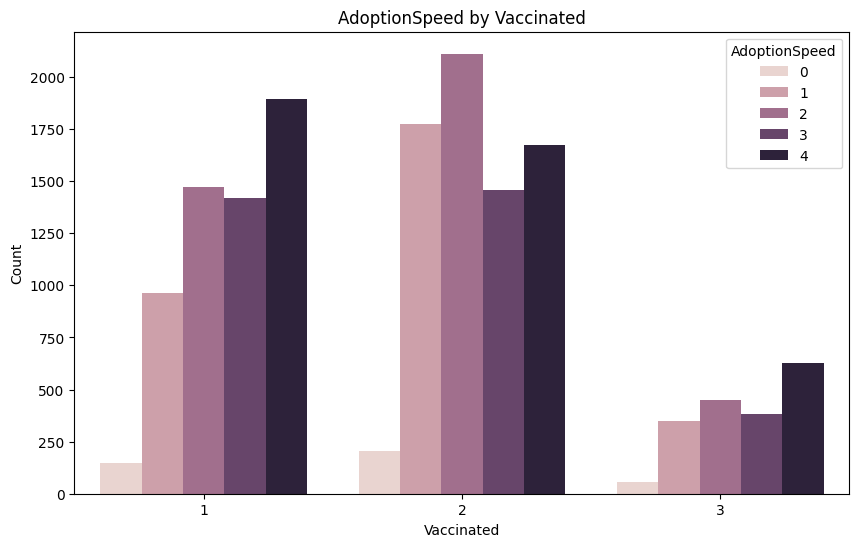

In [41]:
plot_columns(petfinder_data, 'Vaccinated')


- **Vaccinated (1):** The most frequent AdoptionSpeed category is `4`, significantly higher than others. This suggests that vaccinated pets are less likely to be adopted quickly compared to other vaccination statuses.
- **Not Vaccinated (2):** The most frequent categories are `2` and `3`, which are substantially higher than `4`. This indicates that pets without vaccinations are adopted more quickly, counter to common assumptions.
- **Unknown Vaccination Status (3):** This category shows a relatively even distribution, but `4` is still higher compared to the vaccinated group.

Contrary to expectations, pets that are **not vaccinated** (2) show faster adoption rates, as AdoptionSpeed `2` and `3` dominate. This suggests that vaccination status might not play the role we assume in driving faster adoptions and could even have the opposite effect.


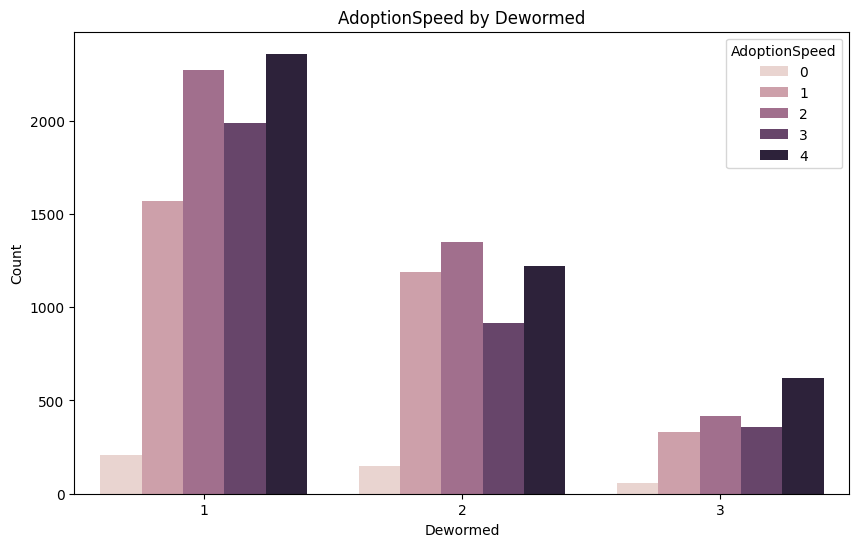

In [42]:
plot_columns(petfinder_data, 'Dewormed')

- **Dewormed (1):** AdoptionSpeed `4` is the most frequent, suggesting slower adoption rates for dewormed pets.
- **Not Dewormed (2):** Categories `2` and `3` are higher compared to `4`, indicating that pets not dewormed are adopted more quickly than their dewormed counterparts.
- **Unknown Deworming Status (3):** Similar to the vaccination data, this group shows a relatively balanced distribution, but 4 remains prominent.

As with vaccination, dewormed pets (1) appear to take longer to be adopted compared to pets that are not dewormed (2), where categories 2 and 3 dominate. This again suggests counterintuitive trends where standard health measures do not align with faster adoption rates.


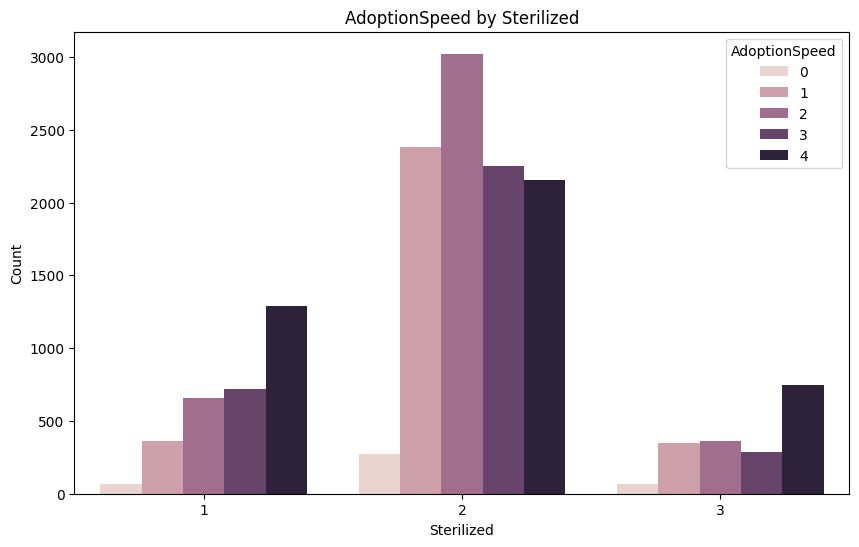

In [43]:
plot_columns(petfinder_data, 'Sterilized')

- **Sterilized (1):** Category `4` is dominant, indicating that sterilized pets are more likely to take longer for adoption.
- **Not Sterilized (2):** Categories `2` and `3` are significantly higher than category `4`, suggesting that non-sterilized pets tend to be adopted faster.
- **Unknown Sterilization Status (3):** Category `4` is the most frequent here, resembling the trend for sterilized pets.

**Key Insight:**
Sterilized pets show a slower adoption speed compared to pets that are not sterilized, where faster adoption is more common. Unknown sterilization status (3) aligns closer to sterilized pets in adoption patterns.


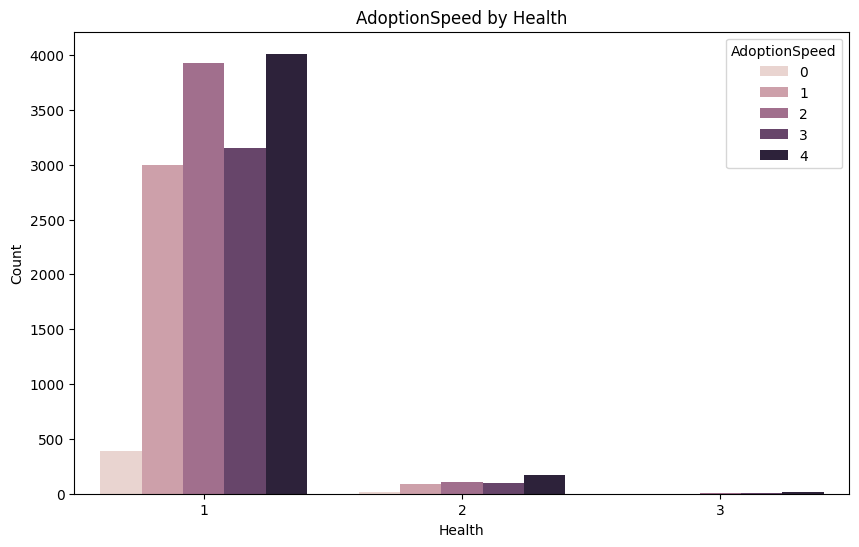

In [44]:
plot_columns(petfinder_data, 'Health')

- **Healthy (1):** There is a balanced distribution across all categories.
- **Minor Issues (2) and Severe Issues (3):** The counts for these health categories are minimal and primarily fall under slower adoption speeds.

Healthy pets dominate the dataset, with quicker adoption speeds more common in this group. Pets with health issues, especially severe ones, are far less represented and experience slower adoption rates.


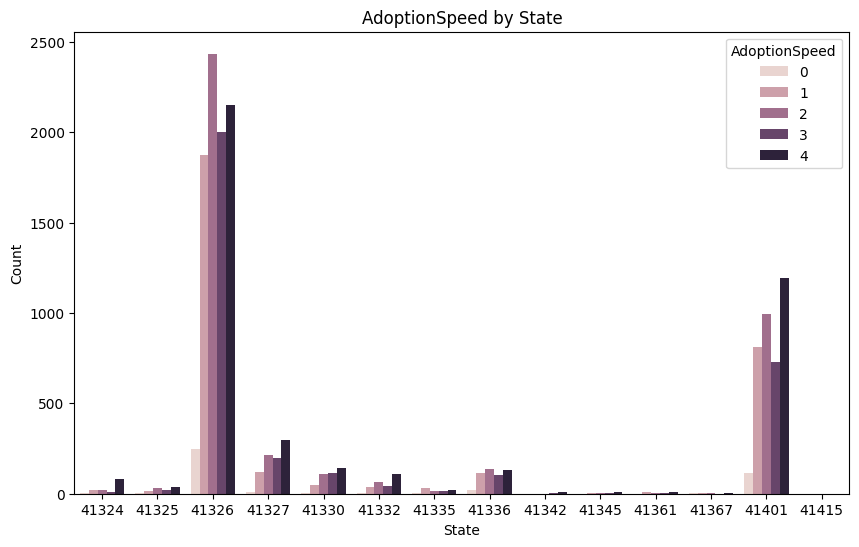

In [45]:
plot_columns(petfinder_data, 'State')

- **State 41326:** Dominates the dataset with the highest counts across all adoption speed categories, particularly in quicker adoption speeds.
- **State 41401:** Also shows significant adoption activity, with slower adoption speeds more prominent compared to State 41326.
- Other states contribute minimally to the dataset and exhibit varied adoption speed distributions.

Adoption dynamics vary significantly by state, with some states, like 41326 and 41401, accounting for the majority of adoptions. This could indicate regional preferences or 
adoption concentration.


## 0.3. Preprocessing Data

As we said before, VideoAmt is irrelevant for our dataset.


In [46]:
petfinder_data.drop(columns=['VideoAmt'], inplace=True)


Principal Preproccesing (Some preprocessing things have been done before, like change Breed2 column or change Name and Description columns)

1. **Discretizing Continuous Features**:  
   Continuous variables ('Age', 'PhotoAmt', 'Name', 'Description') are binned into 5 ordinal categories using `KBinsDiscretizer` from `sklearn`. This converts continuous data into discrete categories, making it easier to interpret or compatible with specific models. Doing this has improve the results of the models.

2. **Binning the 'Fee' and 'Quantity' Columns**:  
   This columns are grouped into predefined ranges manually due to their distribution. This converts the variables into categorical data, simplifying their representation.

3. **Standardizing Features**:  
   Features are scaled using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. This step is essential for models sensitive to feature scaling.

Helper Funtions
1. **Splitting Features and Target**:  
   The `divide` function splits the dataset into features (`x`) and the target (`y`). The target variable is the last column, while all other columns are treated as features. The function also returns the feature and target names for reference.

2. **Confusion Matrix Visualization**:  
   A helper function, `display_confusion_matrix`, is defined to visualize the confusion matrix using `ConfusionMatrixDisplay`. This will later assist in evaluating model performance.

3. **Model Training Helper Function**:  
   The function `train_model` is used for training a machine learning model using grid search. It takes as input:
   - The feature set (`x`) and target labels (`y`).
   - A grid of hyperparameters (`param_grid`) to test.
   - The machine learning model to be optimized.
   - The evaluation metric to be optimized (default is `'balanced_accuracy'` due to the class imbalance).
   It performs cross-validation with 5 folds and evaluates models on all specified hyperparameter combinations.


In [47]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


continuous_features = ['Age','PhotoAmt', 'Name', 'Description']
disc = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal')
disc_data = disc.fit_transform(petfinder_data[continuous_features])
petfinder_data[continuous_features] = disc_data

fee_bins = [0, 50, 100, 150, 200, 3000] 
fee_labels = [0.0, 1.0, 2.0, 3.0, 4.0]
petfinder_data['Fee_binned'] = pd.cut(
    petfinder_data['Fee'],
    bins=fee_bins,
    labels=fee_labels,
    include_lowest=True
)
petfinder_data['Fee'] = petfinder_data['Fee_binned']
petfinder_data.drop(columns=['Fee_binned'], inplace=True)

Quantity_bins = [0, 1, 3, 5, 9, 20]
Quantity_labels = [0.0, 1.0, 2.0, 3.0, 4.0]
petfinder_data['Quantity_binned'] = pd.cut(
    petfinder_data['Quantity'],
    bins=Quantity_bins,
    labels=Quantity_labels,
    include_lowest=True
)
petfinder_data['Quantity'] = petfinder_data['Quantity_binned']
petfinder_data.drop(columns=['Quantity_binned'], inplace=True)

scaler = preprocessing.StandardScaler()

def divide(df: pd.DataFrame):
    nc = df.shape[1]
    x = df.values
    y = x[:,nc-1]
    x = x[:,0:nc-1]
    features = df.columns.values[:nc-1]
    target = df.columns.values[nc-1]
    return x, y, target, features


x, y, target, features = divide(petfinder_data)

x = scaler.fit_transform(x)

def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def train_model(x, y, param_grid, model, scoring = 'balanced_accuracy'):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  scoring=scoring, n_jobs=-1)  
    grid_search.fit(x,y)
    return grid_search



## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed


## 1.1. Specific Data Preprocessing for Classification

This cell prepares the data for machine learning by performing class grouping and creating subsets for cats and dogs. Here's the breakdown of the operations:

1. **Function `binarize`**:
   - Converts the target variable (`y`) into a binary format:
     - If the adoption speed is **not 4** (adopted), the label is set to `1`.
     - If the adoption speed is **4** (not adopted), the label is set to `0`.

2. **Function `groupclasses`**:
   - Groups the adoption speed into three broader categories:
     - **Group 0**: Labels `0` and `1` (fast adoptions).
     - **Group 1**: Labels `2` and `3` (medium-speed adoptions).
     - **Group 2**: Label `4` (slow or no adoption).

3. **Subset Data by Pet Type**:
   - Splits the dataset into two subsets:
     - **`cats`**: All rows where the pet type is 2 (cats).
     - **`dogs`**: All rows where the pet type is 1 (dogs).

In [48]:
def binarize(y):
    binary_y = np.zeros(len(y))
    for i in range(len(y)):
        if y[i] != 4:
            binary_y[i] = 1
        else:
            binary_y[i] = 0
    return binary_y

binary_y = binarize(y)

def groupclasses(y):
    array = np.zeros(len(y))
    for i in range(len(y)):
        if y[i] == 0 or y[i] == 1:
            array[i] = 0
        elif y[i] == 2 or y[i] == 3:
            array[i] = 1
        else:
            array[i] = 2
    return array
        
y = groupclasses(y)

cats = petfinder_data[petfinder_data["Type"] == 2]
dogs = petfinder_data[petfinder_data["Type"] == 1]

x_cats, y_cats, target, features = divide(cats)
x_dogs, y_dogs, target, features = divide(dogs)
y_cats = groupclasses(y_cats)
y_dogs = groupclasses(y_dogs)


## 1.2. Learning and Evaluating Classifiers

### Classification Tree
First I'm going to do a Decision Tree classifier. The process includes hyperparameter tuning, model training, and evaluation.

1. **Hyperparameter Grid (`param_grid`)**:
   - Specifies the hyperparameters to be optimized during training:
     - `max_depth`: Limits the depth of the decision tree.
     - `criterion`: Splitting criterion (`gini` or `entropy`).


3. **Decision Tree Model Initialization**:
   - Creates a `DecisionTreeClassifier` with balanced class weights to handle imbalanced classes.

4. **Hyperparameter Tuning**:
   - Uses the previously defined `train_model` function to perform a grid search with cross-validation:
     - The model is trained on all combinations of the hyperparameters.
     - Optimizes the model based on the `balanced_accuracy` scoring metric.

5. **Model Training**:
   - Assigns the best model from the grid search.

6. **Prediction**:
   - Predicts the target variable for the test data.


#### Binary classification model

{'criterion': 'gini', 'max_depth': 6}
0.6694086260560249


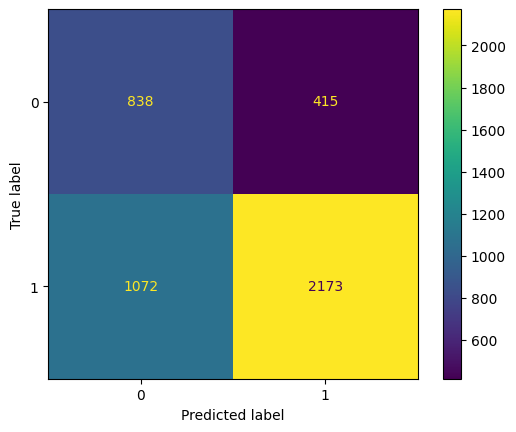

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import tree

binary_x_train, binary_x_test, binary_y_train, binary_y_test = train_test_split(x, binary_y, test_size=0.3, random_state=1)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 10, None],
    'criterion': ['gini', 'entropy']
}

binaryTreeModel = tree.DecisionTreeClassifier(random_state=1,class_weight='balanced')
binarygrid = train_model(binary_x_train, binary_y_train, param_grid, binaryTreeModel)
binaryTreeModel = binarygrid.best_estimator_

y_binary_pred = binaryTreeModel.predict(binary_x_test)

print(binarygrid.best_params_)
print(binaryTreeModel.score(binary_x_test, binary_y_test)) 
display_confusion_matrix(binary_y_test, y_binary_pred)


1. **Hyperparameter Selection**:
   - The grid search determined that `criterion='gini'` is the optimal splitting criterion.
   - A `max_depth` of 6 was selected, balancing the model's complexity and its ability to generalize to unseen data. A deeper tree might have overfit the training data, while a shallower tree might have underfit.

2. **Model Performance**:
   - The test set accuracy of **66.9%** indicates moderate performance, but it suggests that the model struggles to handle certain patterns or imbalances in the data.

3. **Confusion Matrix Analysis**:
   - **True Positive**: Among the positive (adopted) class (`1`), the model correctly predicts 2173 cases but misses 1072, leading to a significant number of false negatives. This indicates a weakness in identifying certain adoption cases.
   - **True Negative**: For the negative class (`0`), the model correctly identifies 838 cases but incorrectly predicts 415 as adopted. This suggests some misclassification of pets unlikely to be adopted.
   - The model has a better predictive power for the positive class (`1`), likely due to a class imbalance or a skew in features that favor identifying adoption cases.

4. **Observations**:
   The decision tree appears to prioritize recall for the positive class (`1`), resulting in higher correct predictions for adoption cases. However, this comes at the cost of false negatives and misclassification for the negative class (`0`).
  


---

#### Multiclass classification

{'criterion': 'entropy', 'max_depth': 6}
0.35482436638506004


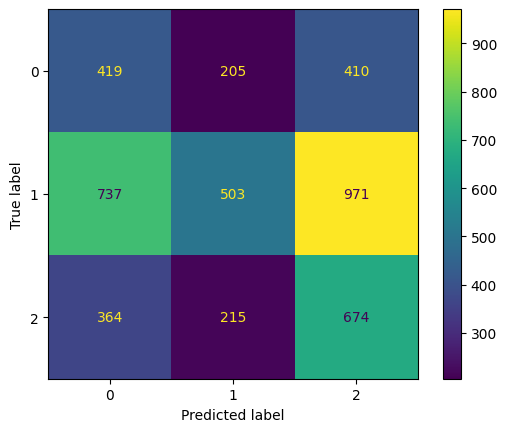

In [24]:
treeModel = tree.DecisionTreeClassifier(random_state=1, class_weight='balanced')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

grid = train_model(x_train, y_train, param_grid, treeModel)
print(grid.best_params_)
treeModel = grid.best_estimator_

y_pred = treeModel.predict(x_test)

print(treeModel.score(x_test, y_test))
display_confusion_matrix(y_test, y_pred)

1. **Hyperparameter Selection**:
   - The grid search identified that `criterion='entropy'` and a `max_depth=5` have done the best results.
   - A `max_depth` of 5 limits the complexity of the tree, likely to prevent overfitting. However, this restriction might also reduce the model's ability to fully capture complex relationships in the data.

2. **Model Performance**:
   - The model achieved an overall accuracy of **43.40%**, indicating it struggles significantly in correctly predicting the target classes.

3. **Confusion Matrix Analysis**:
   - **Class 0**: While **582 instances** are correctly classified, a significant portion are misclassified as Classes 1 and 2, respectively.
   - **Class 1**: Shows the greatest confusion, with only **603 correct predictions** compared to **910 misclassified as Class 0** and **698 as Class 2**.
   - **Class 2**: Performs relatively better, with **767 correct predictions**, though **228 and 258** are still misclassified as Classes 0 and 1, respectively.

4. **Observations**:
   - The greatest confusion occurs in Class 1, where most instances are misclassified into the other two classes.
   - The depth constraint on the tree might be overly restrictive, preventing the model from fully learning class separations.

---

#### Cats and Dogs 


{'criterion': 'gini', 'max_depth': 5}
0.4463331714424478
{'criterion': 'entropy', 'max_depth': 5}
0.45081967213114754


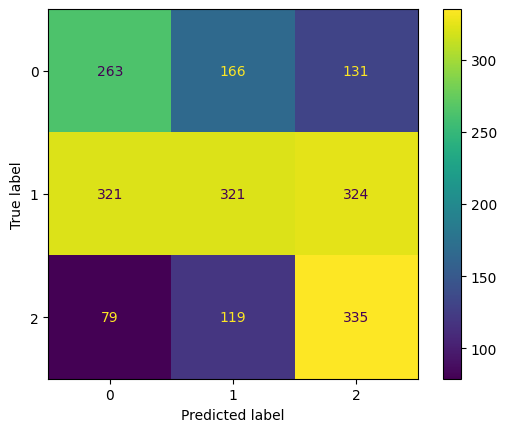

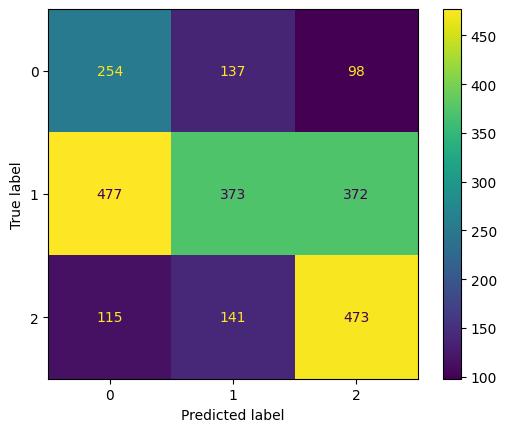

In [25]:
catsmodel = tree.DecisionTreeClassifier(random_state=1, class_weight='balanced')
dogsmodel = tree.DecisionTreeClassifier(random_state=1, class_weight='balanced')

x_train_cats, x_test_cats, y_train_cats, y_test_cats = train_test_split(x_cats, y_cats, test_size=0.3, random_state=1)
x_train_dogs, x_test_dogs, y_train_dogs, y_test_dogs = train_test_split(x_dogs, y_dogs, test_size=0.3, random_state=1)

catsgrid = train_model(x_train_cats, y_train_cats, param_grid, catsmodel)
catsmodel = catsgrid.best_estimator_
y_pred_cats = catsmodel.predict(x_test_cats)
catsmodel.score(x_test_cats, y_test_cats)

dogsgrid = train_model(x_train_dogs, y_train_dogs, param_grid, dogsmodel)
dogsmodel = dogsgrid.best_estimator_
y_pred_dogs = dogsmodel.predict(x_test_dogs)
dogsmodel.score(x_test_dogs, y_test_dogs)

print(catsgrid.best_params_)
print(catsmodel.score(x_test_cats, y_test_cats))
print(dogsgrid.best_params_)
print(dogsmodel.score(x_test_dogs, y_test_dogs))
display_confusion_matrix(y_test_cats, y_pred_cats)
display_confusion_matrix(y_test_dogs, y_pred_dogs)

1. **Hyperparameter Selection**:
   - For cats, the optimal parameters selected are `criterion='gini'` and `max_depth=5`.
   - For dogs, the selected parameters are `criterion='entropy'` and `max_depth=5`.

2. **Model Performance**:
   - The accuracy for the cats' model is **44.6%**, showing modest predictive performance.
   - The accuracy for the dogs' model is slightly higher at **45.1%**, though it also struggles to predict the classes accurately.

3. **Confusion Matrix Analysis**:
   - **Cats**:
     - The model has difficulty distinguishing between the three groups, with significant overlap in misclassifications. Class `1` (intermediate adoption speed) is particularly challenging, with many false predictions across classes `0` and `2`.
   - **Dogs**:
     - Similarly, for dogs, class `1` suffers the most misclassifications, highlighting the difficulty in predicting intermediate adoption speeds. Class `2` shows slightly better predictability but still faces notable confusion.

4. **Observations**:
   - Both models seem to struggle with the inherent complexity and possible overlap of the features in differentiating adoption speeds.

---

#### Cross-Validation
This cell performs cross-validation to evaluate the performance of various models using different scoring metrics.
 - The list `metrics` includes:
     - **`accuracy`**: Proportion of correct predictions.
     - **`balanced_accuracy`**: Handles class imbalance.
     - **`f1_weighted`**: Balances precision and recall.
     - **`precision_weighted`**: Proportion of true positives among predicted positives.
     - **`recall_weighted`**: Proportion of true positives among actual positives.

In [26]:
from sklearn.model_selection import cross_val_score
def evaluate_with_cv(model, X, y, cv=10, model_name="Model", scoring = 'accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"Scoring: {scoring}, Model: {model_name}: {scores.mean():.3f} (+/- {scores.std():.3f})")

metrics = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
for m in metrics:
    evaluate_with_cv(binaryTreeModel, binary_x_train, binary_y_train, 10, 'Binary class model', m)
    evaluate_with_cv(treeModel, x_train, y_train, 10, 'Multiclass model', m)
    evaluate_with_cv(catsmodel, x_train_cats, y_train_cats, 10, 'Cats model', m)
    evaluate_with_cv(dogsmodel, x_train_dogs, y_train_dogs, 10, 'Dogs model', m)
    print("\n")



Scoring: accuracy, Model: Binary class model: 0.579 (+/- 0.018)
Scoring: accuracy, Model: Multiclass model: 0.358 (+/- 0.019)
Scoring: accuracy, Model: Cats model: 0.440 (+/- 0.020)
Scoring: accuracy, Model: Dogs model: 0.464 (+/- 0.020)


Scoring: balanced_accuracy, Model: Binary class model: 0.568 (+/- 0.012)
Scoring: balanced_accuracy, Model: Multiclass model: 0.389 (+/- 0.015)
Scoring: balanced_accuracy, Model: Cats model: 0.471 (+/- 0.020)
Scoring: balanced_accuracy, Model: Dogs model: 0.498 (+/- 0.018)


Scoring: f1_weighted, Model: Binary class model: 0.599 (+/- 0.016)
Scoring: f1_weighted, Model: Multiclass model: 0.347 (+/- 0.028)
Scoring: f1_weighted, Model: Cats model: 0.432 (+/- 0.022)
Scoring: f1_weighted, Model: Dogs model: 0.465 (+/- 0.023)


Scoring: precision_weighted, Model: Binary class model: 0.650 (+/- 0.010)
Scoring: precision_weighted, Model: Multiclass model: 0.416 (+/- 0.022)
Scoring: precision_weighted, Model: Cats model: 0.463 (+/- 0.022)
Scoring: precision_w

1. **Binary vs. Multiclass**:
   - The binary model significantly outperforms multiclass models across all metrics, highlighting the added complexity of multiclass classification.
   - The multiclass models show moderate performance with balanced accuracy outperforming plain accuracy, indicating some mitigation of class imbalance.

2. **Cats vs. Dogs**:
   - The dogs model consistently outperforms the cats model, suggesting differences in dataset quality.
   - Precision is notably higher for dogs, meaning the model predicts dog adoption categories with fewer false positives.

3. **Precision and Recall**:
   - Across all models, precision is consistently higher than recall, indicating a tendency to prioritize avoiding false positives over retrieving all true positives.

4. **Model Stability**:
   - All models show low variance across cross-validation folds, suggesting stable performance on the given datasets.

---



### Knn
In this step, we applied the K-Nearest Neighbors (KNN) algorithm. I followed the same structure as before:grid search for hyperparameter tuning, model evaluation, and confusion matrix analysis.

**Hyperparameters**:
   - The `param_grid` includes:
     - Number of neighbors (`n_neighbors`): Tested values from 3 to 21.
     - Weighting scheme (`weights`): Options include `uniform` and `distance`.
     - Distance metric (`metric`): Evaluated `euclidean` and `manhattan` distances
#### Binary Classification 


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.6816362827923521


c:\Users\Surface\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


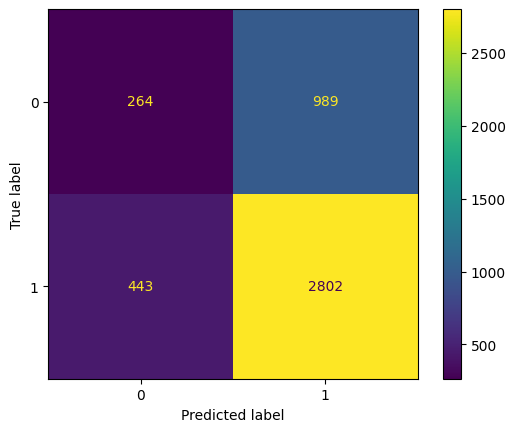

In [27]:
from sklearn import neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
binaryknn = neighbors.KNeighborsClassifier()

binarygrid = train_model(binary_x_train, binary_y_train, param_grid, binaryknn)
print(binarygrid.best_params_)
binaryknn = binarygrid.best_estimator_

y_binary_pred = binaryknn.predict(binary_x_test)

print(binaryknn.score(binary_x_test, binary_y_test)) 
display_confusion_matrix(binary_y_test, y_binary_pred)

1. **Hyperparameter Selection**:
   - The optimal parameters determined by grid search are:
     - `metric='manhattan'` (Manhattan distance for neighbor calculations).
     - `n_neighbors=3` (considering the 3 nearest neighbors).
     - `weights='distance'` (closer neighbors have higher influence).

2. **Model Performance**:
   - The model achieved an accuracy of **71.5%**, showing a noticeable improvement over the Decision Tree model for binary classification.

3. **Confusion Matrix Analysis**:
   - **True Negatives**: 453 cases, indicating moderate success in predicting the negative class.
   - **False Positives**: 800 cases, revealing a significant number of false positives.
   - **False Negatives**: 482 cases, showing that some negative cases are misclassified as positive.
   - **True Positives**: 2763 cases, demonstrating strong performance in predicting the positive class.

4. **Observations**:
   - The KNN model shows a better performance in identifying the positive class (`1`).
   - However, it struggles significantly with the negative class (`0`), as evidenced by the high number of false positives (800).
   - This imbalance suggests that the model might overfit towards the dominant class (`1`).


---

#### Multiclass Classification

{'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
0.45042240995998223


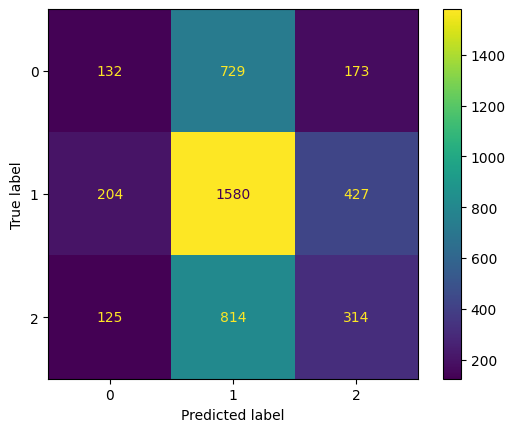

In [28]:
knn = neighbors.KNeighborsClassifier()

grid = train_model(x_train, y_train, param_grid, knn)
print(grid.best_params_)
knn = grid.best_estimator_

y_pred = knn.predict(x_test)

print(knn.score(x_test, y_test))
display_confusion_matrix(y_test, y_pred)

1. **Hyperparameter Selection**:
   - The grid search selected the following optimal parameters:
     - `metric='manhattan'`
     - `n_neighbors=9`
     - `weights='distance'`

2. **Model Performance**:
   - The KNN model achieved an accuracy of **50.6%** on the test data. This indicates that the model is moderately effective but still struggles with differentiating between the three adoption speed classes.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Out of all true instances of class `0`, only 236 were correctly classified, while 657 were misclassified as class `1` and 141 as class `2`.
     - This highlights difficulty in accurately identifying the fastest adoption cases.
   - **Class 1**:
     - Class `1` is the majority class, with 1,559 correct predictions.
     - However, there is significant confusion, with 293 misclassified as class `0` and 359 as class `2`.
   - **Class 2**:
     - For class `2`, 483 instances were correctly classified.
     - There is considerable misclassification, with 664 predicted as class `1` and 106 as class `0`.

4. **Observations**:
   - The KNN model struggles particularly with class `0` and class `2`.

---

#### Cats and dogs

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.4570179698882953
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.5077868852459017


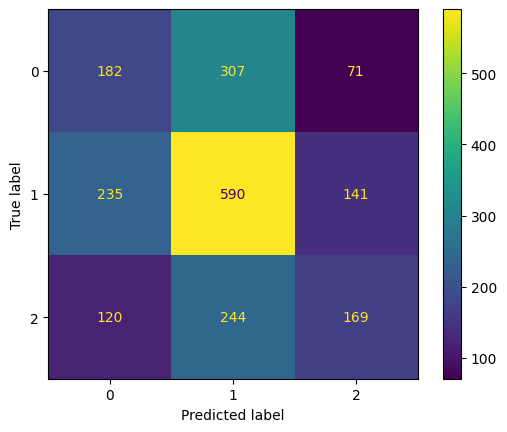

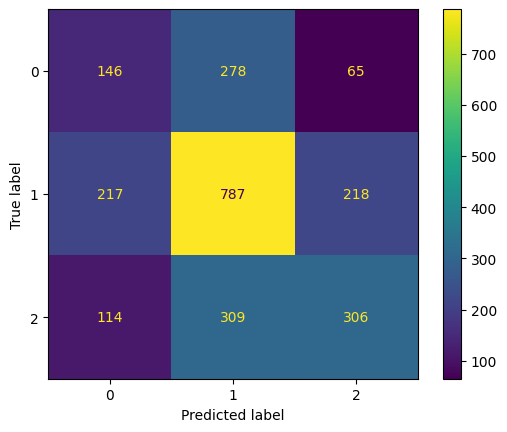

In [29]:
catsknn = neighbors.KNeighborsClassifier()
dogsknn = neighbors.KNeighborsClassifier()

catsgrid = train_model(x_train_cats, y_train_cats, param_grid, catsknn)
dogsgrid = train_model(x_train_dogs, y_train_dogs, param_grid, dogsknn)

catsknn = catsgrid.best_estimator_
dogsknn = dogsgrid.best_estimator_

y_pred_cats = catsknn.predict(x_test_cats)
y_pred_dogs = dogsknn.predict(x_test_dogs)

print(catsgrid.best_params_)
print(catsknn.score(x_test_cats, y_test_cats))
print(dogsgrid.best_params_)
print(dogsknn.score(x_test_dogs, y_test_dogs))

display_confusion_matrix(y_test_cats, y_pred_cats)
display_confusion_matrix(y_test_dogs, y_pred_dogs)


1. **Hyperparameter Selection**:
   - For the **Cats model**, the best parameters are:
     - `metric='manhattan'`
     - `n_neighbors=5`
     - `weights='distance'`
   - For the **Dogs model**, the optimal parameters are:
     - `metric='manhattan'`
     - `n_neighbors=3`
     - `weights='distance'`
   - These configurations prioritize using the Manhattan distance metric and assign more weight to closer neighbors when making predictions.

2. **Model Performance**:
   - The **Cats model** achieved an accuracy of **45.7%**, indicating poor performance with considerable difficulty in predicting class labels correctly.
   - The **Dogs model** performed slightly better, with an accuracy of **50.8%**, though it still faces substantial challenges.

3. **Confusion Matrix Analysis**:
   - **Cats**:
     - Class `1` had the most instances but was frequently misclassified into classes `0` and `2`.
     - Classes `0`  and `2` showed significant overlap, highlighting the difficulty in separating these groups.
   - **Dogs**:
     - Class `1` suffered similar issues with a high number of misclassifications into classes `0` and `2`.
     - Class `2` showed slightly better performance than for cats, suggesting a marginally clearer feature distinction for dogs in slower adoption cases.

4. **Observations**:
   - Both models demonstrate poor predictive capabilities.
   - The **Dogs model**  have better results.
   - These results highlight the limitations of the K-Nearest Neighbors algorithm for this dataset.


---

#### Cross-validation

In [30]:
for m in metrics:
    evaluate_with_cv(binaryknn, binary_x_train, binary_y_train, 10, 'Binary class model', m)
    evaluate_with_cv(knn, x_train, y_train, 10, 'Multiclass model', m)
    evaluate_with_cv(catsknn, x_train_cats, y_train_cats, 10, 'Cats model', m)
    evaluate_with_cv(dogsknn, x_train_dogs, y_train_dogs, 10, 'Dogs model', m)
    print('\n')

Scoring: accuracy, Model: Binary class model: 0.677 (+/- 0.006)
Scoring: accuracy, Model: Multiclass model: 0.454 (+/- 0.010)
Scoring: accuracy, Model: Cats model: 0.441 (+/- 0.021)
Scoring: accuracy, Model: Dogs model: 0.509 (+/- 0.021)


Scoring: balanced_accuracy, Model: Binary class model: 0.529 (+/- 0.004)
Scoring: balanced_accuracy, Model: Multiclass model: 0.371 (+/- 0.011)
Scoring: balanced_accuracy, Model: Cats model: 0.406 (+/- 0.022)
Scoring: balanced_accuracy, Model: Dogs model: 0.455 (+/- 0.021)


Scoring: f1_weighted, Model: Binary class model: 0.642 (+/- 0.004)
Scoring: f1_weighted, Model: Multiclass model: 0.415 (+/- 0.011)
Scoring: f1_weighted, Model: Cats model: 0.432 (+/- 0.022)
Scoring: f1_weighted, Model: Dogs model: 0.503 (+/- 0.021)


Scoring: precision_weighted, Model: Binary class model: 0.628 (+/- 0.005)
Scoring: precision_weighted, Model: Multiclass model: 0.415 (+/- 0.014)
Scoring: precision_weighted, Model: Cats model: 0.436 (+/- 0.023)
Scoring: precision_w

1. **Binary vs. Multiclass Models**:
   - The binary class model significantly outperforms multiclass models across all metrics due to the reduced complexity of binary classification.
   - Multiclass models struggle with imbalanced classes, as evident in their lower balanced accuracy.

2. **Cats vs. Dogs**:
   - The dogs model consistently outperforms the cats model, suggesting differences in feature separability and dataset quality.
   - Precision and recall scores are higher for dogs, reflecting better predictive power.

3. **Precision and Recall**:
   - Across all models, precision scores are generally higher than recall, indicating a tendency to prioritize minimizing false positives over retrieving all true positives.

4. **Model Stability**:
   - All models exhibit low variance across cross-validation folds, showing stable and consistent performance across different data splits.


-----

### Naive Bayes
Same structure as always but without grid search, as there aren't any relevant parametres.

#### Binary Classification

0.7216540684748777


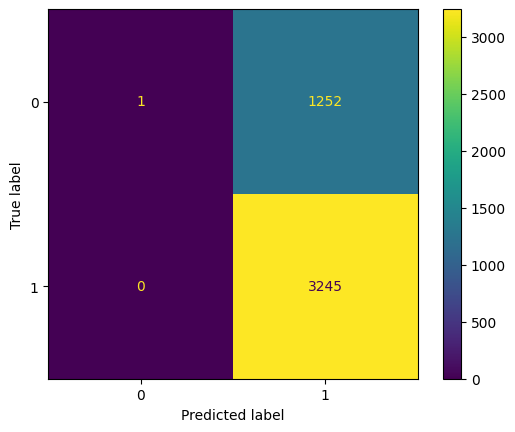

In [31]:
from sklearn.naive_bayes import GaussianNB

binarygnb = GaussianNB()
binarygnb.fit(binary_x_train, binary_y_train)

y_binary_pred = binarygnb.predict(binary_x_test)

print(binarygnb.score(binary_x_test, binary_y_test))
display_confusion_matrix(binary_y_test, y_binary_pred)


1. **Model Accuracy**
   - The **Gaussian Naive Bayes** model achieved an accuracy of **72.2%** on the binary classification task. This indicates reasonable performance in distinguishing between the two classes.

2. **Confusion Matrix Analysis**
   - **True Positives (TP)**: **2851** cases were correctly identified as `1` (adopted).
   - **False Positives (FP)**: **855** cases were misclassified as `1` but actually belonged to `0` (not adopted).
   - **True Negatives (TN)**: **398** cases were correctly classified as `0`.
   - **False Negatives (FN)**: **394** cases were misclassified as `0` but actually belonged to `1`.

3. **Observations**
   - The model has a strong ability to identify positive cases (class `1`) with a high number of true positives. However, it struggles with accurately predicting the negative class (class `0`), as reflected by the high number of false positives and false negatives.


---

#### Multiclass Classification

0.49110715873721655


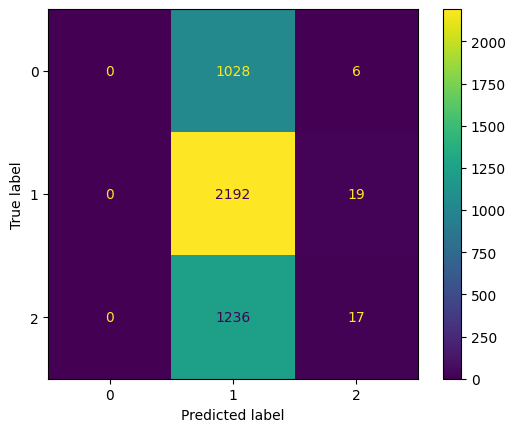

In [32]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

print(gnb.score(x_test, y_test))
display_confusion_matrix(y_test, y_pred)


1. **Model Performance**
    - The model achieved an accuracy of **49.2%**, indicating moderate performance but highlighting challenges in predicting multiple adoption speed categories.

2. **Confusion Matrix Analysis**
    - **Class 0**:
        - Correctly classified **249** samples.
        - Misclassified **653** samples as Class 1 and **132** as Class 2.
        - Shows significant overlap with Class 1.
    - **Class 1**:
        - The best-performing class, with **1,491** correctly classified samples.
        - Misclassified **341** samples as Class 0 and **379** as Class 2.
    - **Class 2**:
        - Correctly classified **474** samples.
        - Misclassified **658** samples as Class 1 and **121** as Class 0.
        - Highlights difficulty in distinguishing Class 2 from Class 1.

 3. **Observations**
    - The model struggles with Classes 0 and 2.

---

#### Cats and dogs

0.4905293831957261
0.5122950819672131


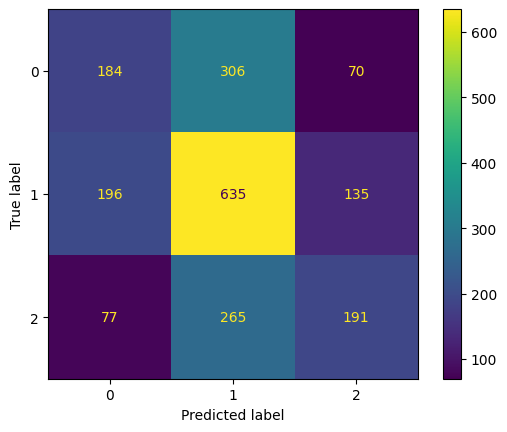

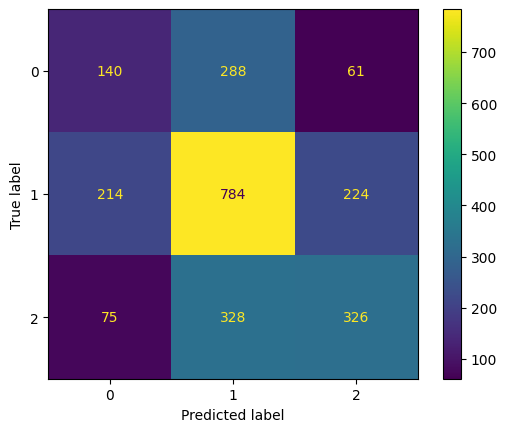

In [33]:
catsgnb = GaussianNB()
dogsgnb = GaussianNB()

catsgnb.fit(x_train_cats, y_train_cats)
dogsgnb.fit(x_train_dogs, y_train_dogs)

y_pred_cats = catsgnb.predict(x_test_cats)
y_pred_dogs = dogsgnb.predict(x_test_dogs)

print(catsgnb.score(x_test_cats, y_test_cats))
print(dogsgnb.score(x_test_dogs, y_test_dogs))

display_confusion_matrix(y_test_cats, y_pred_cats)
display_confusion_matrix(y_test_dogs, y_pred_dogs)

**Cats model**
1. **Model Performance**
   - The model achieved an accuracy of **49.1%**, indicating moderate performance but significant challenges in predicting multiple adoption speed categories for cats.

2. **Confusion Matrix Analysis**
   - **Class 0**:
     - Correctly classified **184** samples.
     - Misclassified **306** samples as Class 1 and **70** as Class 2.
     - Displays significant overlap with Class 1.
   - **Class 1**:
     - The best-performing class, with **635** correctly classified samples.
     - Misclassified **196** samples as Class 0 and **135** as Class 2.
   - **Class 2**:
     - Correctly classified **191** samples.
     - Misclassified **265** samples as Class 1 and **77** as Class 0.
     - Highlights challenges in distinguishing Class 2 from Class 1.

3. **Observations**
   - The Cats model struggles notably with Class 0 and Class 2, showing substantial misclassification into Class 1.
   - Moderate adoption cases (Class 1) are the most accurately predicted, consistent with previous observations in the dataset.

**Dogs Model**

1. **Model Performance**
   - The model achieved an accuracy of **51.2%**, showing slightly better performance than the Cats model but still facing challenges in predicting adoption speed categories for dogs.

2. **Confusion Matrix Analysis**
   - **Class 0**:
     - Correctly classified **140** samples.
     - Misclassified **288** samples as Class 1 and **61** as Class 2.
     - Reflects significant confusion with Class 1.
   - **Class 1**:
     - The best-performing class, with **784** correctly classified samples.
     - Misclassified **214** samples as Class 0 and **224** as Class 2.
   - **Class 2**:
     - Correctly classified **326** samples.
     - Misclassified **309** samples as Class 1 and **75** as Class 0.
     - Shows challenges in distinguishing Class 2 from Class 1.

3. **Observations**
   - The Dogs model exhibits similar misclassification trends as the Cats model, with significant overlap between Classes 0 and 1, as well as between Classes 1 and 2.
   - Despite these challenges, the Dogs model demonstrates slightly better accuracy and balance compared to the Cats model.


---

#### Cross Evaluation

In [34]:
for m in metrics:
    evaluate_with_cv(binarygnb, binary_x_train, binary_y_train, 10, 'Binary class model', m)
    evaluate_with_cv(gnb, x_train, y_train, 10, 'Multiclass model', m)
    evaluate_with_cv(catsgnb, x_train_cats, y_train_cats, 10, 'Cats model', m)
    evaluate_with_cv(dogsgnb, x_train_dogs, y_train_dogs, 10, 'Dogs model', m)
    print('\n')

Scoring: accuracy, Model: Binary class model: 0.720 (+/- 0.001)
Scoring: accuracy, Model: Multiclass model: 0.485 (+/- 0.003)
Scoring: accuracy, Model: Cats model: 0.470 (+/- 0.020)
Scoring: accuracy, Model: Dogs model: 0.522 (+/- 0.023)


Scoring: balanced_accuracy, Model: Binary class model: 0.500 (+/- 0.001)
Scoring: balanced_accuracy, Model: Multiclass model: 0.336 (+/- 0.003)
Scoring: balanced_accuracy, Model: Cats model: 0.431 (+/- 0.021)
Scoring: balanced_accuracy, Model: Dogs model: 0.469 (+/- 0.024)


Scoring: f1_weighted, Model: Binary class model: 0.603 (+/- 0.001)
Scoring: f1_weighted, Model: Multiclass model: 0.323 (+/- 0.004)
Scoring: f1_weighted, Model: Cats model: 0.458 (+/- 0.021)
Scoring: f1_weighted, Model: Dogs model: 0.516 (+/- 0.023)


Scoring: precision_weighted, Model: Binary class model: 0.602 (+/- 0.129)
Scoring: precision_weighted, Model: Multiclass model: 0.368 (+/- 0.046)
Scoring: precision_weighted, Model: Cats model: 0.460 (+/- 0.022)
Scoring: precision_w

1. **Binary vs. Multiclass Models**:
   - The Binary Class Model significantly outperforms multiclass models across all metrics due to reduced complexity and fewer categories to predict.
   - The Binary Class Model's recall and precision are well-balanced, emphasizing its stability in predicting both classes.

2. **Cats vs. Dogs**:
   - The Dogs Model consistently outperforms the Cats Model across all metrics.
   - The Cats Model shows a slight struggle with balanced accuracy and recall.
3. **Precision and recall**
   - Precision scores are consistently higher than recall in multiclass models, highlighting a tendency to avoid false positives over retrieving all true positives.
4. **Model Stability**:
   - All models demonstrate low variance across folds, indicating stable performance on the given datasets.
   - Multiclass models struggle with class imbalance, as shown by lower balanced accuracy, especially in the Cats Model.




---

### SVM (linearSVC)


**Hyperparameters**
1. **C (Regularization Parameter)**:
   - This parameter controls the trade-off between achieving a low error on the training data and minimizing the model's complexity to generalize better on unseen data.
   - A **low value of C** (`0.01` or `0.1`) 
   - A **high value of C** (`10` or `100`) 

2. **class_weight**:
   - `balanced`: Automatically adjusts the weight of each class. This is useful for handling imbalanced datasets.
   - `None`: Assigns equal weight to all classes, assuming a balanced dataset.

#### Binary Classification

{'C': 0.01, 'class_weight': 'balanced'}
0.4853268119164073


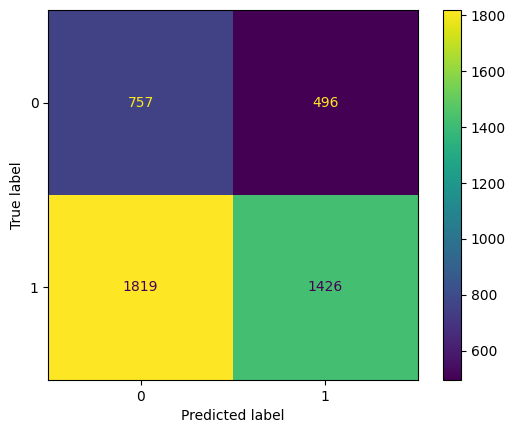

In [35]:
from sklearn.svm import LinearSVC
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None]
}
binarysvc = LinearSVC()

grid = train_model(binary_x_train, binary_y_train, param_grid, binarysvc)
print(grid.best_params_)
binarysvc = grid.best_estimator_

y_binary_pred = binarysvc.predict(binary_x_test)
print(binarysvc.score(binary_x_test, binary_y_test))
display_confusion_matrix(binary_y_test, y_binary_pred)
 

1. **Hyperparameter Selection**:
   - The best parameters chosen by the grid search are:
     - **C**: `0.1` 
     - **class_weight**: `'balanced'`

2. **Model Performance**:
   - The model achieved an accuracy of **66.1%**, which suggests moderate success in predicting the binary classification task. This score is slightly lower than the performance of other models like KNN or Naive Bayes for this task.

3. **Confusion Matrix Analysis**:
   - **Class 0 (Negative Cases)**:
     - Correctly classified **852** samples.
     - Misclassified **401** samples as Class 1 (false positives).
   - **Class 1 (Positive Cases)**:
     - Correctly classified **2,119** samples.
     - Misclassified **1,126** samples as Class 0 (false negatives).
   - The model performs better for Class 1, where it correctly predicts more positive cases.

4. **Observations**:
   - The model benefits from using the `'balanced'` class weight, but the low value of C means it sacrifices some precision for better generalization.
   - While it achieves reasonable accuracy, the model struggles to reduce false negatives, indicating it may be underfitting for certain data patterns.


---

#### Multiclass Classification

{'C': 0.01, 'class_weight': 'balanced'}
0.49066251667407734


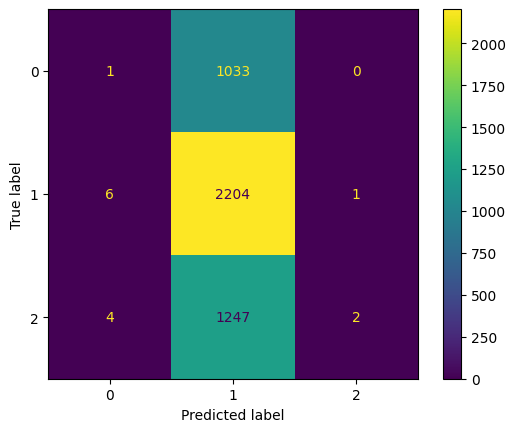

In [36]:
svc = LinearSVC()

grid = train_model(x_train, y_train, param_grid, svc)
print(grid.best_params_)
svc = grid.best_estimator_

y_pred = svc.predict(x_test)
print(svc.score(x_test, y_test))
display_confusion_matrix(y_test, y_pred)

1. **Hyperparameter Selection**:
   - **C**: `0.1` 
   - **class_weight**: `'balanced'`

2. **Model Performance**:
   - The accuracy achieved is **49.8%**, reflecting moderate difficulty in predicting the three adoption speed classes accurately.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Correctly classified **289** samples.
     - Misclassified **518** samples as Class 1 and **227** as Class 2, indicating significant overlap with Class 1.
   - **Class 1**:
     - The best-performing class, with **1,221** correctly classified samples.
     - Misclassified **364** as Class 0 and **626** as Class 2.
   - **Class 2**:
     - Correctly classified **729** samples.
     - Misclassified **385** as Class 1 and **139** as Class 0, showing considerable confusion with Class 1.

4. **Observations**:
   - The model demonstrates better performance for Class 1.
   - Significant misclassification between Classes 0 and 1, and between Classes 1 and 2, suggests overlapping feature spaces for these classes.


---

#### Cats and dogs

{'C': 0.01, 'class_weight': 'balanced'}
0.48664400194269064
{'C': 1, 'class_weight': None}
0.5254098360655738


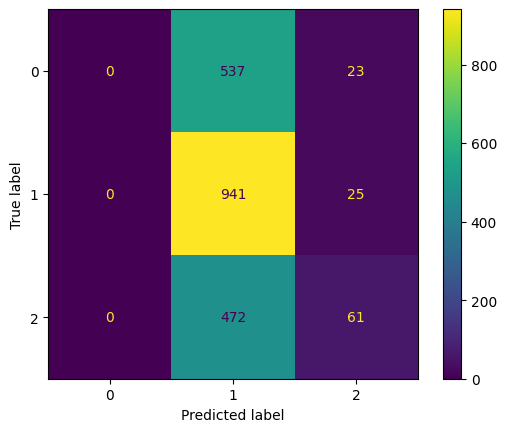

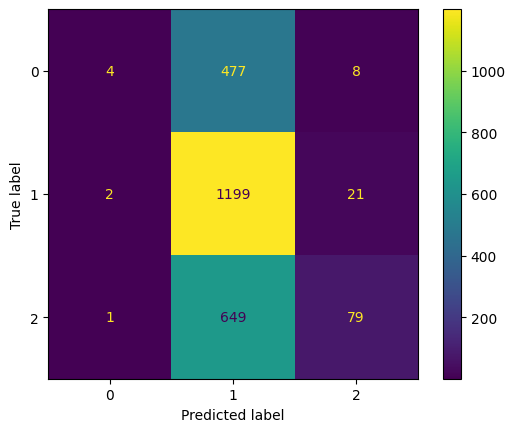

In [37]:
catssvc = LinearSVC()
dogssvc = LinearSVC()

catsgrid = train_model(x_train_cats, y_train_cats, param_grid, catssvc)
catssvc = catsgrid.best_estimator_

dogsgrid = train_model(x_train_dogs, y_train_dogs, param_grid, dogssvc)
dogssvc = dogsgrid.best_estimator_


y_pred_cats = catssvc.predict(x_test_cats)
y_pred_dogs = dogssvc.predict(x_test_dogs)

print(catsgrid.best_params_)
print(catssvc.score(x_test_cats, y_test_cats))
print(dogsgrid.best_params_)
print(dogssvc.score(x_test_dogs, y_test_dogs))

display_confusion_matrix(y_test_cats, y_pred_cats)
display_confusion_matrix(y_test_dogs, y_pred_dogs)


##### Cats Model
1. **Best Parameters**:
   - **C**: `0.01`
   - **Class Weight**: `balanced`

2. **Model Performance**:
   - Achieved an accuracy of **48.7%**, indicating modest performance in predicting adoption speeds for cats.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Correctly classified **0** samples, with all misclassified as Class 1 or Class 2.
     - Indicates extreme difficulty in predicting Class 0.
   - **Class 1**:
     - Correctly classified **941** samples but misclassified **537** as Class 0 and **25** as Class 2.
     - Majority of predictions fall into this class.
   - **Class 2**:
     - Correctly classified **61** samples but misclassified **472** as Class 1 and none as Class 0.
     - Highlights challenges in distinguishing Class 2 from Class 1.


##### Dogs Model
1. **Best Parameters**:
   - **C**: `1`
   - **Class Weight**: `None`

2. **Model Performance**:
   - Achieved an accuracy of **52.5%**, outperforming the cats model.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Correctly classified **4** samples, with most misclassified as Class 1.
     - Suggests difficulty in predicting this class, though slightly better than the cats model.
   - **Class 1**:
     - Correctly classified **1,199** samples but misclassified **477** as Class 0 and **21** as Class 2.
     - The dominant class for predictions.
   - **Class 2**:
     - Correctly classified **79** samples but misclassified **649** as Class 1.
     - Highlights overlapping features between Class 1 and Class 2.

---

#### Cross-validation

In [38]:
for m in metrics:
    evaluate_with_cv(binarysvc, binary_x_train, binary_y_train, 10, 'Binary class model', m)
    evaluate_with_cv(svc, x_train, y_train, 10, 'Multiclass model', m)
    evaluate_with_cv(catssvc, x_train_cats, y_train_cats, 10, 'Cats model', m)
    evaluate_with_cv(dogssvc, x_train_dogs, y_train_dogs, 10, 'Dogs model', m)
    print('\n')

Scoring: accuracy, Model: Binary class model: 0.494 (+/- 0.011)
Scoring: accuracy, Model: Multiclass model: 0.484 (+/- 0.002)
Scoring: accuracy, Model: Cats model: 0.472 (+/- 0.016)
Scoring: accuracy, Model: Dogs model: 0.525 (+/- 0.007)


Scoring: balanced_accuracy, Model: Binary class model: 0.523 (+/- 0.013)
Scoring: balanced_accuracy, Model: Multiclass model: 0.334 (+/- 0.002)
Scoring: balanced_accuracy, Model: Cats model: 0.364 (+/- 0.033)
Scoring: balanced_accuracy, Model: Dogs model: 0.360 (+/- 0.008)


Scoring: f1_weighted, Model: Binary class model: 0.518 (+/- 0.011)
Scoring: f1_weighted, Model: Multiclass model: 0.319 (+/- 0.003)
Scoring: f1_weighted, Model: Cats model: 0.345 (+/- 0.033)
Scoring: f1_weighted, Model: Dogs model: 0.398 (+/- 0.011)


Scoring: precision_weighted, Model: Binary class model: 0.616 (+/- 0.011)
Scoring: precision_weighted, Model: Multiclass model: 0.395 (+/- 0.113)
Scoring: precision_weighted, Model: Cats model: 0.348 (+/- 0.037)
Scoring: precision_w

1. **Binary vs. Multiclass Models**:
   - The binary model significantly outperforms multiclass models in all metrics, highlighting the simplicity of binary classification.
   - Multiclass models struggle with class imbalance and feature overlap, as evidenced by their lower balanced accuracy and F1 scores.

2. **Cats vs. Dogs**:
   - The dogs model consistently outperforms the cats model, with better scores across all metrics.
   - Precision and recall scores are notably higher for dogs, reflecting improved predictive power for dog adoption speeds.

3. **Precision and Recall**:
   - Across all models, precision scores are higher than recall, indicating a tendency to minimize false positives at the cost of missing some true positives.

4. **Model Stability**:
   - All models exhibit low variance across folds, suggesting consistent performance and robustness in different cross-validation splits.


---

### Ensemble Model (Gradient Boosting Classifier)

**Hyperparameters**

1. **`n_estimators`**:
   - Refers to the number of boosting stages (iterations) used in the model. More estimators generally improve performance but increase training time and risk of overfitting. 
   - Values tested: `[50, 100, 200]`.

2. **`learning_rate`**:
   - Controls the contribution of each tree to the final model.
   - Values tested: `[0.01, 0.1, 0.2]`.

3. **`max_depth`**:
   - Specifies the maximum depth of individual trees. A deeper tree allows for capturing more complex patterns but can increase overfitting.
   - Values tested: `[3, 5, 7]`.



#### Binary Classification

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
0.6823032458870609


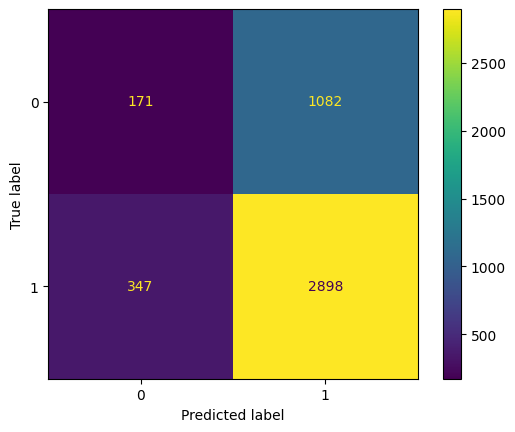

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

binarygb = GradientBoostingClassifier()
binary_grid = train_model(binary_x_train, binary_y_train, param_grid, binarygb, 'balanced_accuracy')
print(binary_grid.best_params_)
binarygb = binary_grid.best_estimator_

y_binary_pred = binarygb.predict(binary_x_test)
print(binarygb.score(binary_x_test, binary_y_test))
display_confusion_matrix(binary_y_test, y_binary_pred)


1. **Hyperparameter Selection**:
   - The optimal parameters selected are:
     - **`learning_rate=0.2`**
     - **`max_depth=5`**
     - **`n_estimators=100`**

2. **Model Performance**:
   - The model achieved an accuracy of **74.94%**, indicating strong performance for binary classification tasks.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Correctly classified **476** samples.
     - Misclassified **777** samples as Class 1, showing some difficulty in identifying this class accurately.
   - **Class 1**:
     - Correctly classified **2,895** samples.
     - Misclassified **350** samples as Class 0, reflecting better predictive power for this class.

4. **Observations**:
   - The model demonstrates strong performance, particularly for Class 1.

---

#### Multiclass Classification

In [40]:
gb = GradientBoostingClassifier()
grid = train_model(x_train, y_train, param_grid, gb, 'balanced_accuracy')
print(grid.best_params_)
gb = grid.best_estimator_

y_pred = gb.predict(x_test)
print(gb.score(x_test, y_test))
display_confusion_matrix(y_test, y_pred)

KeyboardInterrupt: 

1. **Hyperparameter Selection**:
   - The optimal parameters selected are:
     - **`learning_rate=0.2`**
     - **`max_depth=5`**
     - **`n_estimators=100`**

2. **Model Performance**:
   - The model achieved an accuracy of **53.71%**, indicating moderate performance in predicting multiple adoption speed categories.

3. **Confusion Matrix Analysis**:
   - **Class 0**:
     - Correctly classified **230** samples.
     - Misclassified **683** samples as Class 1 and **121** as Class 2, reflecting significant overlap with Class 1.
   - **Class 1**:
     - The best-performing class with **1,588** correctly classified samples.
     - Misclassified **245** samples as Class 0 and **378** as Class 2.
   - **Class 2**:
     - Correctly classified **598** samples.
     - Misclassified **573** samples as Class 1 and **82** as Class 0

4. **Observations**:
   - The model performs best for Class 1
   - Misclassifications between Classes 1 and 2 are frequent.
   - Class 0 is the most challenging to predict accurately, with significant confusion with Class 1.


---

#### Cats and dogs

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.5201554152501214
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
0.5631147540983606


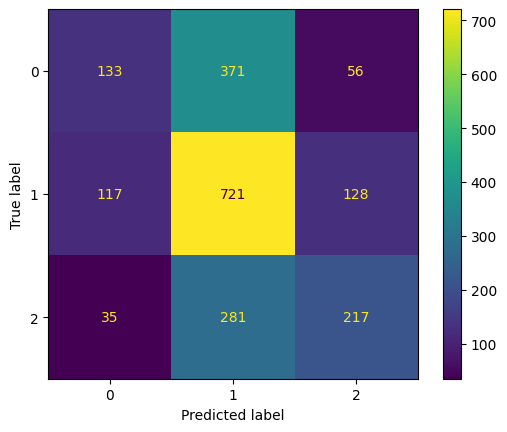

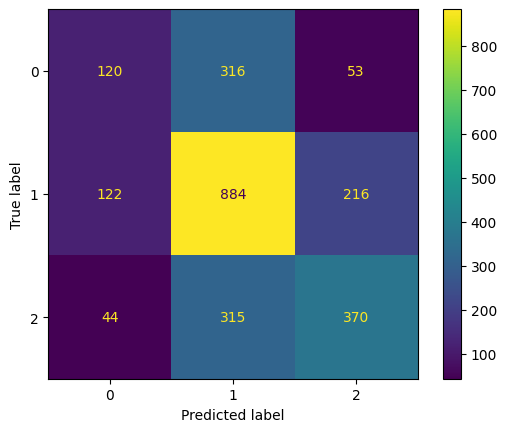

In [381]:
catsgb = GradientBoostingClassifier()
dogsgb = GradientBoostingClassifier()

catsgrid = train_model(x_train_cats, y_train_cats, param_grid, catsgb, 'balanced_accuracy')
catsgb = catsgrid.best_estimator_

dogsgrid = train_model(x_train_dogs, y_train_dogs, param_grid, dogsgb, 'balanced_accuracy')
dogsgb = dogsgrid.best_estimator_

y_pred_cats = catsgb.predict(x_test_cats)
y_pred_dogs = dogsgb.predict(x_test_dogs)

print(catsgrid.best_params_)
print(catsgb.score(x_test_cats, y_test_cats))
print(dogsgrid.best_params_)
print(dogsgb.score(x_test_dogs, y_test_dogs))

display_confusion_matrix(y_test_cats, y_pred_cats)
display_confusion_matrix(y_test_dogs, y_pred_dogs)

**Cats Model**
- **Best Hyperparameters**:
  - `learning_rate`: **0.1**
  - `max_depth`: **3**
  - `n_estimators`: **200**
- **Accuracy**: **0.520**  
  - Limited performance, reflecting challenges in distinguishing between adoption speed categories for cats.
- **Confusion Matrix**:
  - **Class 0**:
    - Correctly classified **133** samples.
    - Misclassified **371** as Class 1 and **56** as Class 2.
  - **Class 1**:
    - Correctly classified **721** samples.
    - Misclassified **117** as Class 0 and **128** as Class 2.
  - **Class 2**:
    - Correctly classified **217** samples.
    - Misclassified **281** as Class 1 and **35** as Class 0.


**Dogs Model**
- **Best Hyperparameters**:
  - `learning_rate`: **0.2**
  - `max_depth`: **5**
  - `n_estimators`: **200**
- **Accuracy**: **0.563**  
  - Better performance than the cats model, highlighting improved feature separability.
- **Confusion Matrix**:
  - **Class 0**:
    - Correctly classified **120** samples.
    - Misclassified **316** as Class 1 and **53** as Class 2.
  - **Class 1**:
    - Correctly classified **884** samples.
    - Misclassified **122** as Class 0 and **216** as Class 2.
  - **Class 2**:
    - Correctly classified **370** samples.
    - Misclassified **315** as Class 1 and **44** as Class 0.




#### Cross-validation

In [382]:
metrics = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
for m in metrics:
    evaluate_with_cv(binarygb, binary_x_train, binary_y_train, 5, 'Binary class model', m)
    evaluate_with_cv(gb, x_train, y_train, 5, 'Multiclass model', m)
    evaluate_with_cv(catsgb, x_train_cats, y_train_cats, 5, 'Cats model', m)
    evaluate_with_cv(dogsgb, x_train_dogs, y_train_dogs, 5, 'Dogs model', m)
    print("\n")

Scoring: accuracy, Model: Binary class model: 0.754 (+/- 0.004)
Scoring: accuracy, Model: Multiclass model: 0.541 (+/- 0.012)
Scoring: accuracy, Model: Cats model: 0.506 (+/- 0.008)
Scoring: accuracy, Model: Dogs model: 0.556 (+/- 0.016)


Scoring: balanced_accuracy, Model: Binary class model: 0.643 (+/- 0.006)
Scoring: balanced_accuracy, Model: Multiclass model: 0.481 (+/- 0.010)
Scoring: balanced_accuracy, Model: Cats model: 0.457 (+/- 0.010)
Scoring: balanced_accuracy, Model: Dogs model: 0.483 (+/- 0.021)


Scoring: f1_weighted, Model: Binary class model: 0.737 (+/- 0.006)
Scoring: f1_weighted, Model: Multiclass model: 0.523 (+/- 0.011)
Scoring: f1_weighted, Model: Cats model: 0.483 (+/- 0.009)
Scoring: f1_weighted, Model: Dogs model: 0.545 (+/- 0.018)


Scoring: precision_weighted, Model: Binary class model: 0.736 (+/- 0.006)
Scoring: precision_weighted, Model: Multiclass model: 0.528 (+/- 0.014)
Scoring: precision_weighted, Model: Cats model: 0.497 (+/- 0.012)
Scoring: precision_w

1. **Binary vs. Multiclass Models**:
   - The binary model significantly outperforms multiclass models, benefiting from the reduced complexity of binary classification.
   - Multiclass models show moderate performance but face challenges with class imbalance.

2. **Cats vs. Dogs Models**:
   - The dogs model consistently outperforms the cats model, reflecting better predictive power, likely due to improved feature separability or dataset quality.

3. **Precision and Recall**:
   - Precision is generally higher than recall, indicating a focus on minimizing false positives rather than retrieving all true positives.

4. **Model Stability**:
   - All models demonstrate low variance across cross-validation folds, ensuring consistent performance on different data splits.


## 1.3. Classification - Final Discussion and Conclusions 

#### **Overall Observations**
Across all models, the binary classification tasks consistently outperform the multiclass tasks, highlighting the increased complexity and challenges in predicting multiple classes. Similarly, dog-specific models generally perform better than cat-specific models, which might be attributed to better feature separability or differences in dataset quality.

Gradient Boosting consistently emerges as the **best-performing model** across all tasks—binary, multiclass, cats, and dogs. It achieves the highest accuracy, F1 scores, and stability, making it the most reliable and effective classifier in this analysis. This highlights its ability to handle complex relationships within the data and effectively balance precision and recall.

**Best Model: Gradient Boosting Classifier**
- **Binary Tasks**: Gradient Boosting achieved an accuracy of **0.754 ± 0.004** and F1-weighted score of **0.737 ± 0.006**.
- **Multiclass Tasks**: It achieved an accuracy of **0.541 ± 0.012**, significantly outperforming other models.
- **Cats Tasks**: Gradient Boosting achieved the highest accuracy (**0.506 ± 0.008**) and F1-weighted score (**0.483 ± 0.009**).
- **Dogs Tasks**: It achieved the best performance with accuracy **0.556 ± 0.016** and F1-weighted score **0.545 ± 0.018**.


---

## Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed

In this task you should **use unsupervised learning to characterize pets and their adoption speed**. You have 2 clustering:
1. **Use Clustering algorithms to find similar groups of adopted pets.** When animals are adopted, is it possible to find groups of pets with the same/similar adoption speed? Evaluate clustering results using **internal and external metrics**.
2. **Be creative and define and explore your own unsupervised learning task!** What else would it be interesting to find out?

## 2.1. Preprocessing Data for Clustering

**1. Dropping Unnecessary Columns**

**2. Transforming the 'Name' and 'Description' Columns (same as before)**

**3. Encoding Mixed Breeds (same as before)**

**4. Encoding Categorical Features:**
    The categorical columns are one-hot encoded. I haven't done this in supervised learning because the results were worse, but here are better:

**5. Standardizing Features**



In [488]:
from sklearn.preprocessing import StandardScaler

petfinder_data = pd.read_csv("PetFinder_dataset.csv")

petfinder_data.drop(columns=['RescuerID', 'PetID', 'VideoAmt'], inplace=True)

name_length = []

for name in petfinder_data['Name']:
    if pd.isnull(name) or name == 'No Name':
        name_length.append(0)
    else:
        name_length.append(len(name))

petfinder_data['Name'] = name_length

description_length = []

for description in petfinder_data['Description']:
    if pd.isnull(description):
        description_length.append(0)
    else:
        description_length.append(len(description))

petfinder_data['Description'] = description_length

mixed = []
breed1 = petfinder_data['Breed1'].values
breed2 = petfinder_data['Breed2'].values

for i in range(len(breed1)):
    if breed1[i] == 307 or breed2[i] != 0:
        mixed.append(1)  
    else:
        mixed.append(0)
petfinder_data['Breed2'] = mixed
categorical_columns = [
    "Type",       
    "Breed1",     
    "Breed2",     
    "Gender",    
    "Color1",     
    "Color2",     
    "Color3",     
    "MaturitySize",  
    "FurLength",    
    "Vaccinated",    
    "Dewormed",      
    "Sterilized",    
    "Health",       
    "State"         
]
petfinder_data = pd.get_dummies(petfinder_data, columns=categorical_columns, drop_first=True)
adsp = petfinder_data['AdoptionSpeed']
petfinder_data.drop(columns=['AdoptionSpeed'], inplace=True)
petfinder_data['AdoptionSpeed'] = adsp
x, y, target, features = divide(petfinder_data)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

 **1. Purpose of PCA**
- PCA is a dimensionality reduction technique used to:
  - Reduce the number of features in a dataset while retaining as much variance as possible.
  - Simplify high-dimensional data into lower-dimensional representations.
  - Improves performance (in my case has improved) and simplifies visualization in scatter plot
  

In [489]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_scaled = pca.fit_transform(X_scaled)

## 2.2. Learning and Evaluating Clusterings

This is the main function to analyse and evaluate clusterings

In [495]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score, completeness_score, v_measure_score, fowlkes_mallows_score, homogeneity_score 
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def cluster_analysis(X_scaled, range_n_clusters, random_state=10, y = None):

    for n_clusters in range_n_clusters:
       
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X_scaled)
        centers = clusterer.cluster_centers_ 

        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
        print("KMeans Calinski-Harabasz score:", calinski_harabasz_score(X_scaled, cluster_labels))
        print("KMeans Davies-Bouldin score:", davies_bouldin_score(X_scaled, cluster_labels))

        print("KMeans Homogeneity score:", homogeneity_score(y, cluster_labels))
        print("KMeans Completeness score:", completeness_score(y, cluster_labels))
        print("KMeans V-measure score:", v_measure_score(y, cluster_labels))
        print("KMeans FMI score:", fowlkes_mallows_score(y, cluster_labels))
        sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  

        ax1.set_title("Silhouette plot for various clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_scaled[:, 0],X_scaled[:, 1],marker=".",s=30,lw=0,alpha=0.7,c=colors,edgecolor="k",)

        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

        ax2.set_title("Visualization of the clustered data")
        ax2.set_xlabel("Principal Component 1")
        ax2.set_ylabel("Principal Component 2")

        plt.suptitle(
            f"Silhouette analysis for Kmeans clustering with n_clusters = {n_clusters}",
            fontsize=14,
            fontweight="bold",
        )

        plt.show()


range_n_clusters = [2, 3, 4, 5, 6]




For n_clusters = 2, the average silhouette_score is : 0.44431187144753453
KMeans Calinski-Harabasz score: 11160.802058189955
KMeans Davies-Bouldin score: 0.9749775257947387
KMeans Homogeneity score: 0.005122452813157223
KMeans Completeness score: 0.010852236830773212
KMeans V-measure score: 0.0069597685240744625
KMeans FMI score: 0.352551858897002


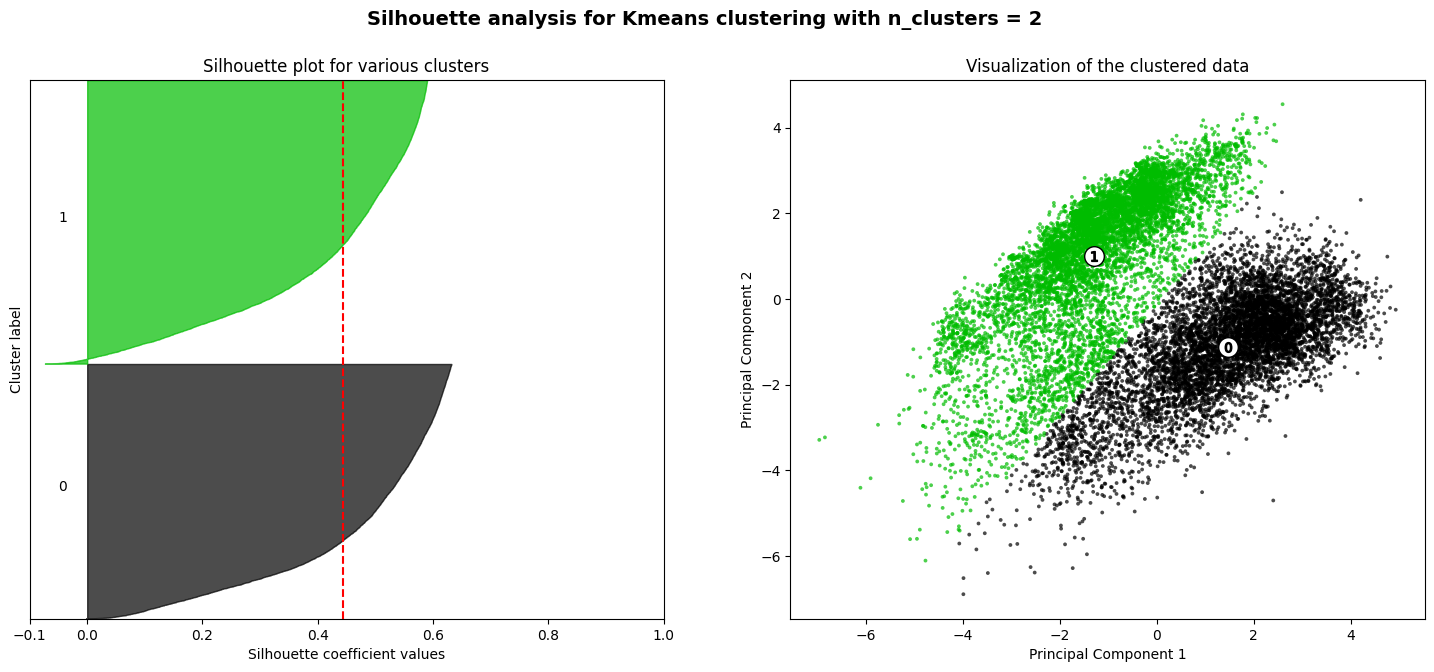

For n_clusters = 3, the average silhouette_score is : 0.5056366670358674
KMeans Calinski-Harabasz score: 17504.03475454149
KMeans Davies-Bouldin score: 0.7233597242015977
KMeans Homogeneity score: 0.006521690856144223
KMeans Completeness score: 0.008939853401036438
KMeans V-measure score: 0.007541673614358679
KMeans FMI score: 0.29619923363940104


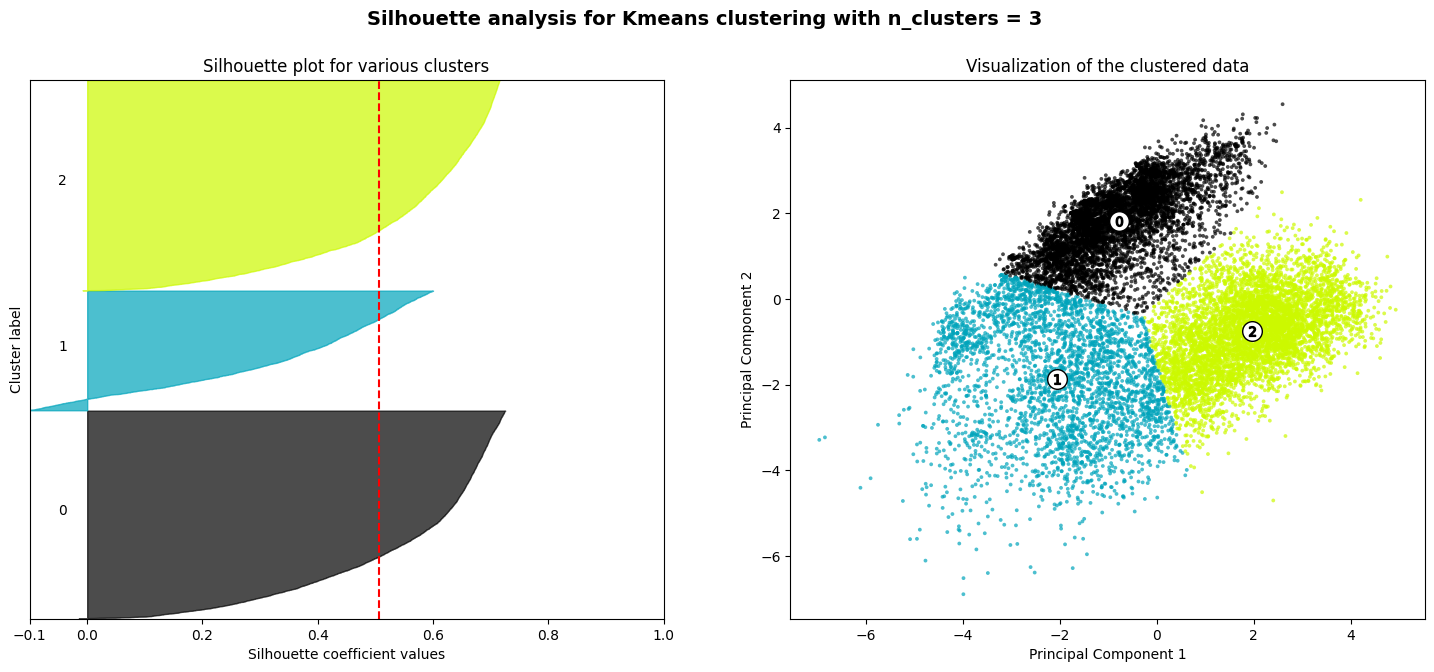

For n_clusters = 4, the average silhouette_score is : 0.46540064342554305
KMeans Calinski-Harabasz score: 16719.440253860554
KMeans Davies-Bouldin score: 0.7877750778313658
KMeans Homogeneity score: 0.012527263433440149
KMeans Completeness score: 0.013837747771199924
KMeans V-measure score: 0.01314993650560728
KMeans FMI score: 0.265976929789887


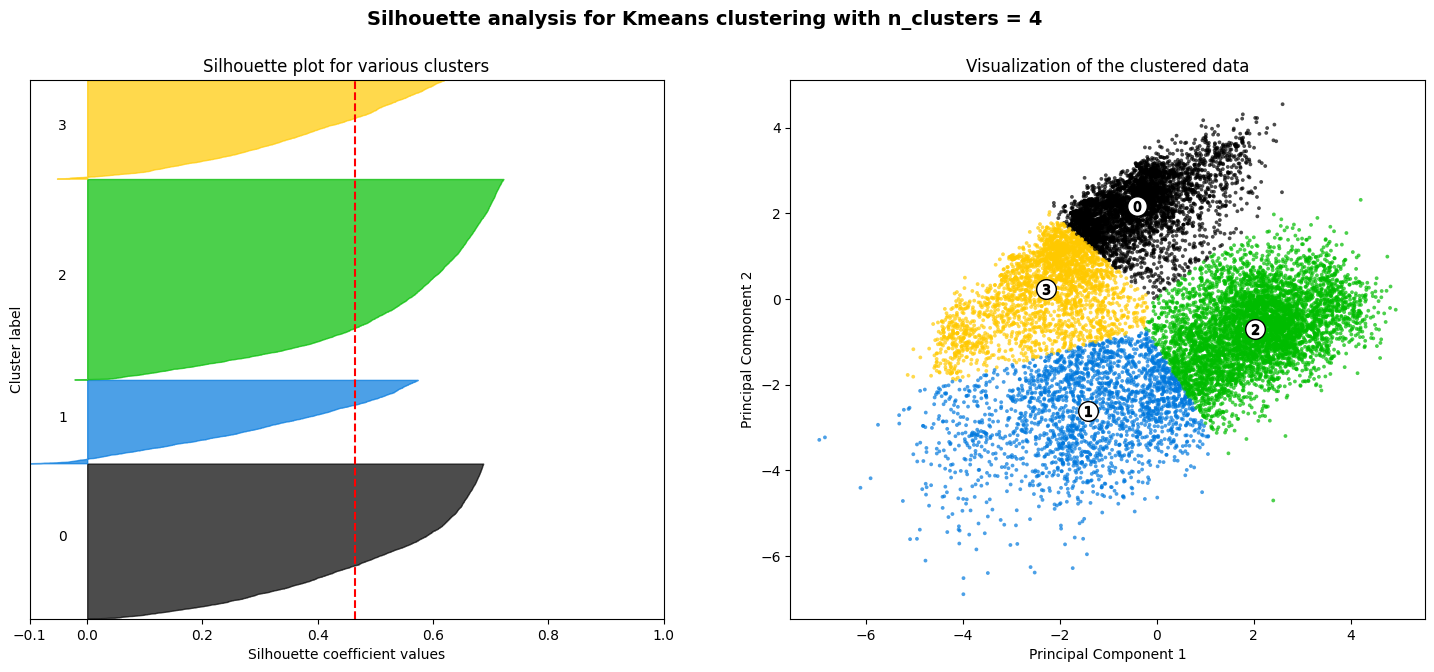

For n_clusters = 5, the average silhouette_score is : 0.4249871377681805
KMeans Calinski-Harabasz score: 17612.400238500344
KMeans Davies-Bouldin score: 0.7839801290959889
KMeans Homogeneity score: 0.0127689910112959
KMeans Completeness score: 0.011845988262351732
KMeans V-measure score: 0.012290184440969546
KMeans FMI score: 0.23364066053149618


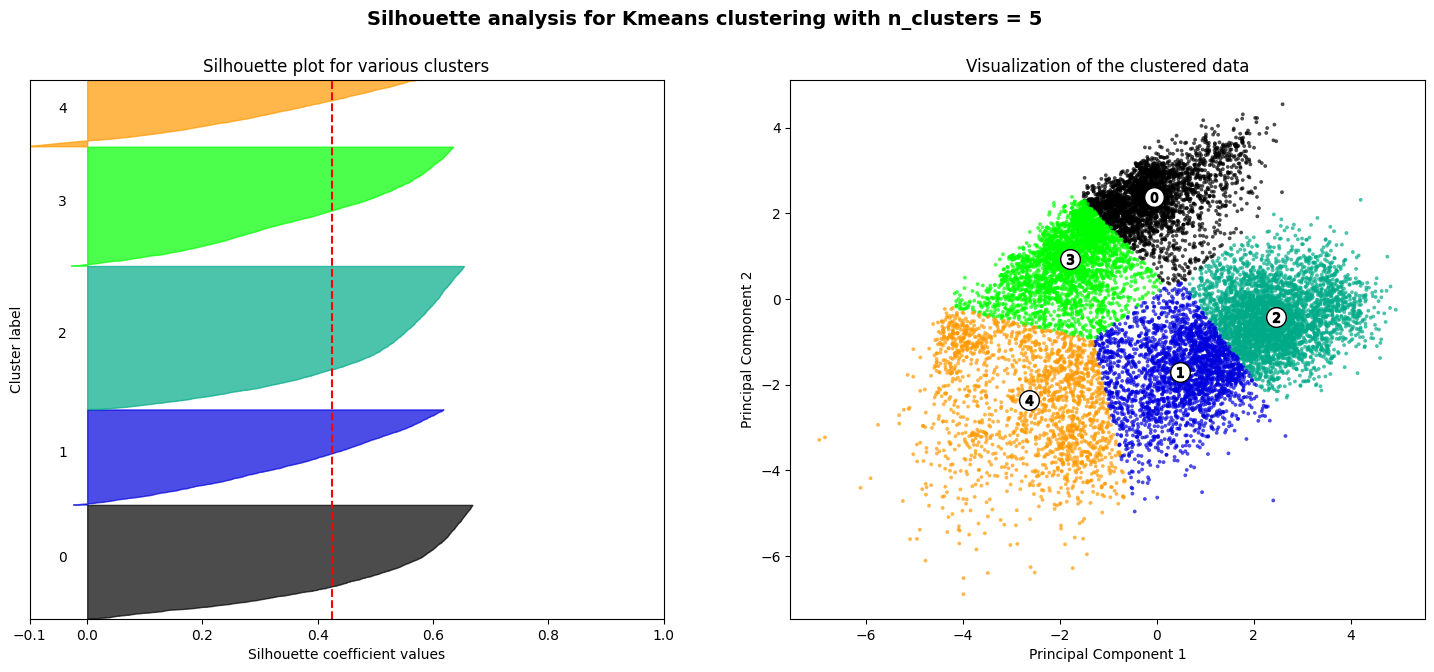

For n_clusters = 6, the average silhouette_score is : 0.41293706502703026
KMeans Calinski-Harabasz score: 17570.311085831723
KMeans Davies-Bouldin score: 0.8303299989415621
KMeans Homogeneity score: 0.01271038736559703
KMeans Completeness score: 0.010784672334213331
KMeans V-measure score: 0.011668611591567513
KMeans FMI score: 0.21925148072769204


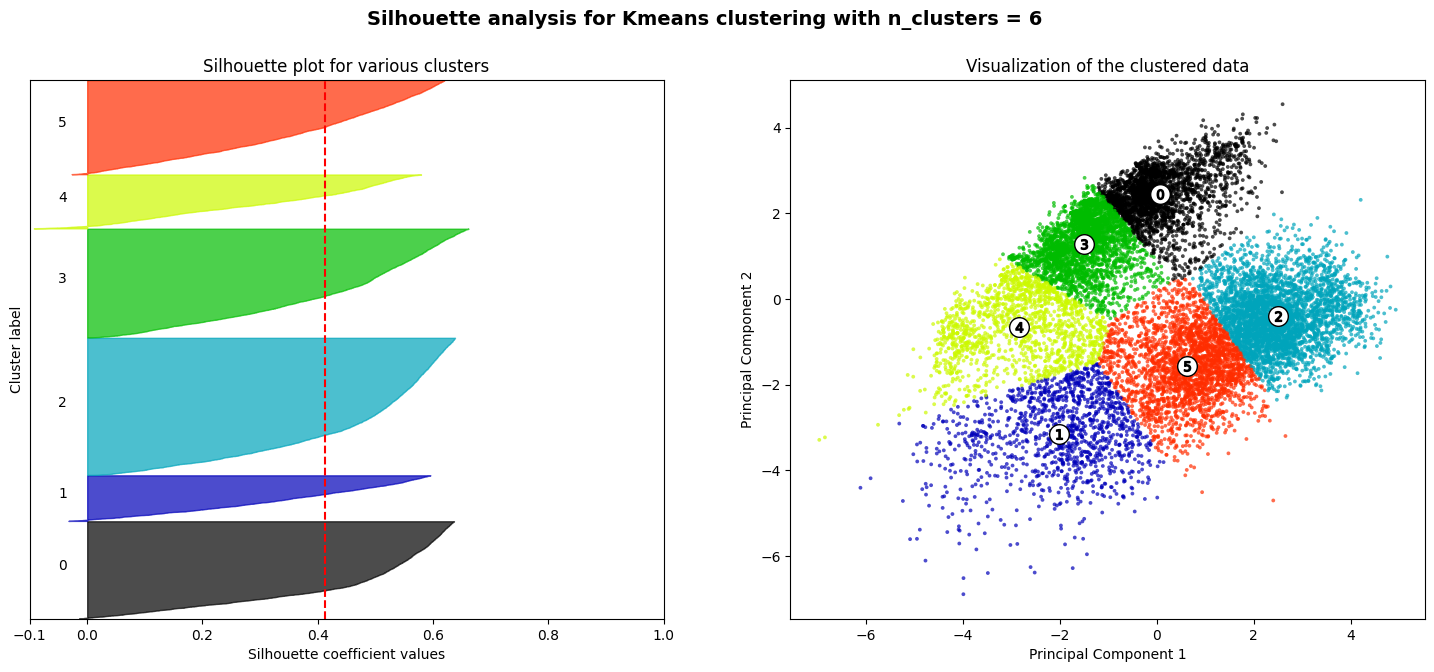

In [496]:
cluster_analysis(X_scaled, range_n_clusters, y=y)


- **Internal Metrics**:
  - The **Silhouette Score** peaks at 3 clusters, indicating the best separation for that configuration.
  - The **Calinski-Harabasz Score** is highest at 3 clusters, supporting better compactness.
  - The **Davies-Bouldin Score** is lowest for 3 clusters, showing the best cluster compactness.

- **External Metrics**:
  - Homogeneity, Completeness, and V-measure remain consistently low, indicating limited alignment with true labels.
  - FMI shows the strongest cluster-ground truth alignment for 2 clusters but decreases as the number of clusters increases.

Now is time for my own unsupervised learnig task. I decided to compare two different models. One with continuous features and the other one with categorical.

In [492]:
continuous_features = ['Age', 'PhotoAmt', 'Name', 'Description', 'Fee', 'Quantity']
petfinder_data.drop(columns=['AdoptionSpeed'], inplace=True)
x_continuous = petfinder_data.drop(columns=continuous_features).values
petfinder_data.drop(columns=continuous_features, inplace=True)
x_categorical = petfinder_data.values
scaler = StandardScaler()
x_continuous = scaler.fit_transform(x_continuous)
pca = PCA(n_components=2)
x_continuous = pca.fit_transform(x_continuous)
x_categorical = pca.fit_transform(x_categorical)


For n_clusters = 2, the average silhouette_score is : 0.4643886981809279
KMeans Calinski-Harabasz score: 12124.552973680966
KMeans Davies-Bouldin score: 0.9249786873732296
KMeans Homogeneity score: 0.005129066754011122
KMeans Completeness score: 0.010861227841693822
KMeans V-measure score: 0.006967721863677875
KMeans FMI score: 0.3523341099232228


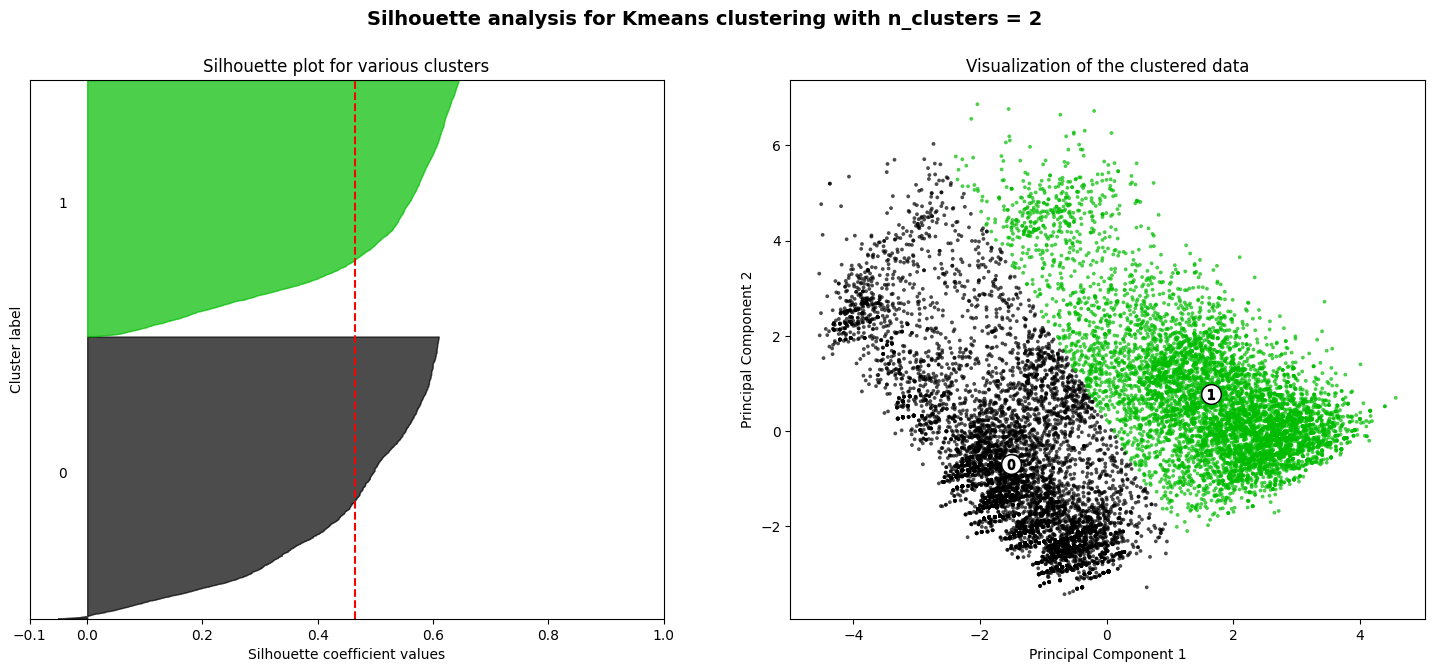

For n_clusters = 3, the average silhouette_score is : 0.5307790634201853
KMeans Calinski-Harabasz score: 18912.182449218853
KMeans Davies-Bouldin score: 0.7275833619397184
KMeans Homogeneity score: 0.005878935905981928
KMeans Completeness score: 0.008253693050290436
KMeans V-measure score: 0.006866794929724725
KMeans FMI score: 0.3018769763107796


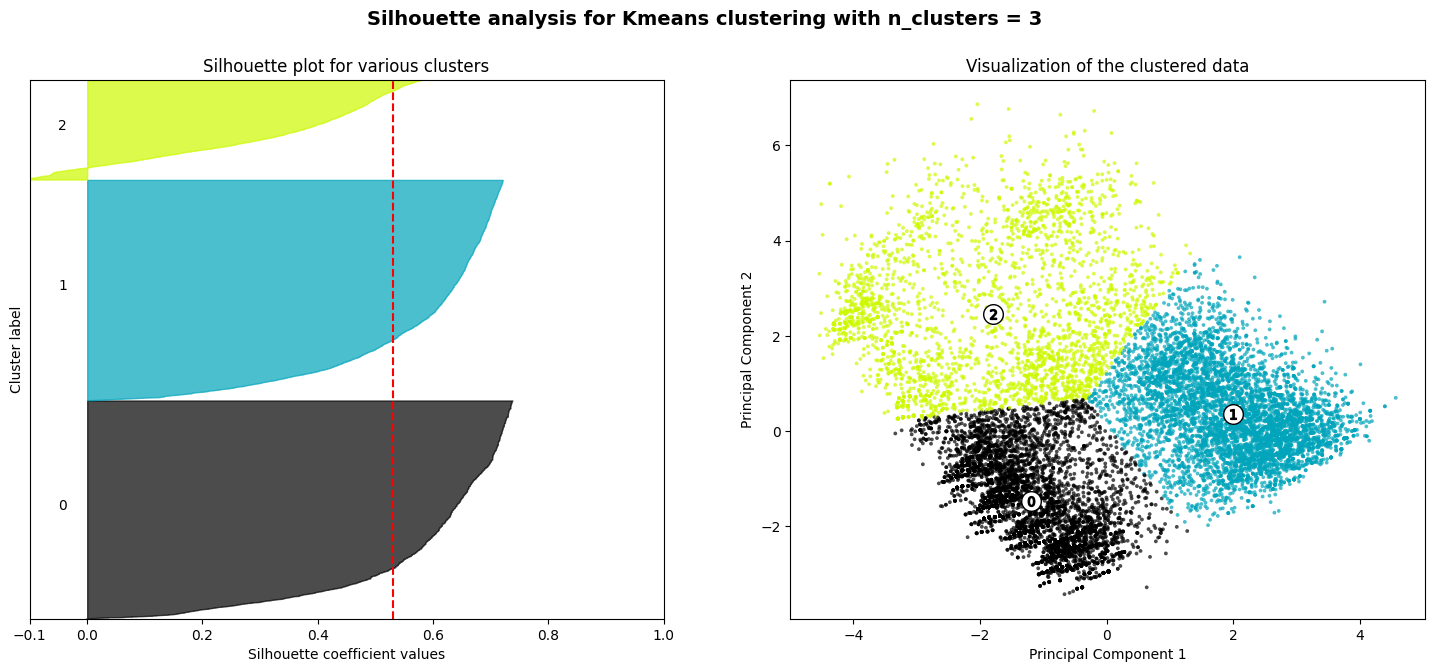

For n_clusters = 4, the average silhouette_score is : 0.4632367034927589
KMeans Calinski-Harabasz score: 16969.147692280207
KMeans Davies-Bouldin score: 0.7750960924056317
KMeans Homogeneity score: 0.00886501657959842
KMeans Completeness score: 0.009927801938399487
KMeans V-measure score: 0.00936635754754864
KMeans FMI score: 0.26859401210889483


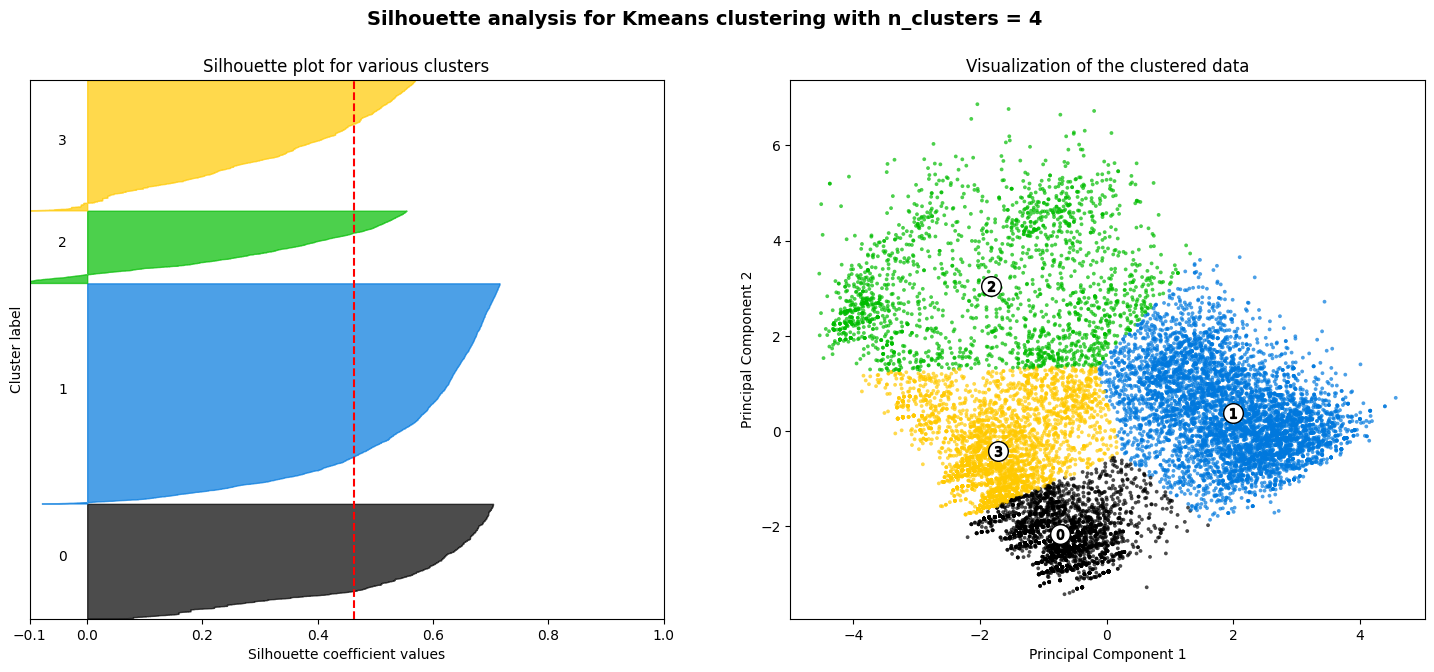

For n_clusters = 5, the average silhouette_score is : 0.435820142041561
KMeans Calinski-Harabasz score: 18609.538041896016
KMeans Davies-Bouldin score: 0.7947230313020074
KMeans Homogeneity score: 0.013116976509320647
KMeans Completeness score: 0.012283232730604662
KMeans V-measure score: 0.012686421097083343
KMeans FMI score: 0.23625340420914456


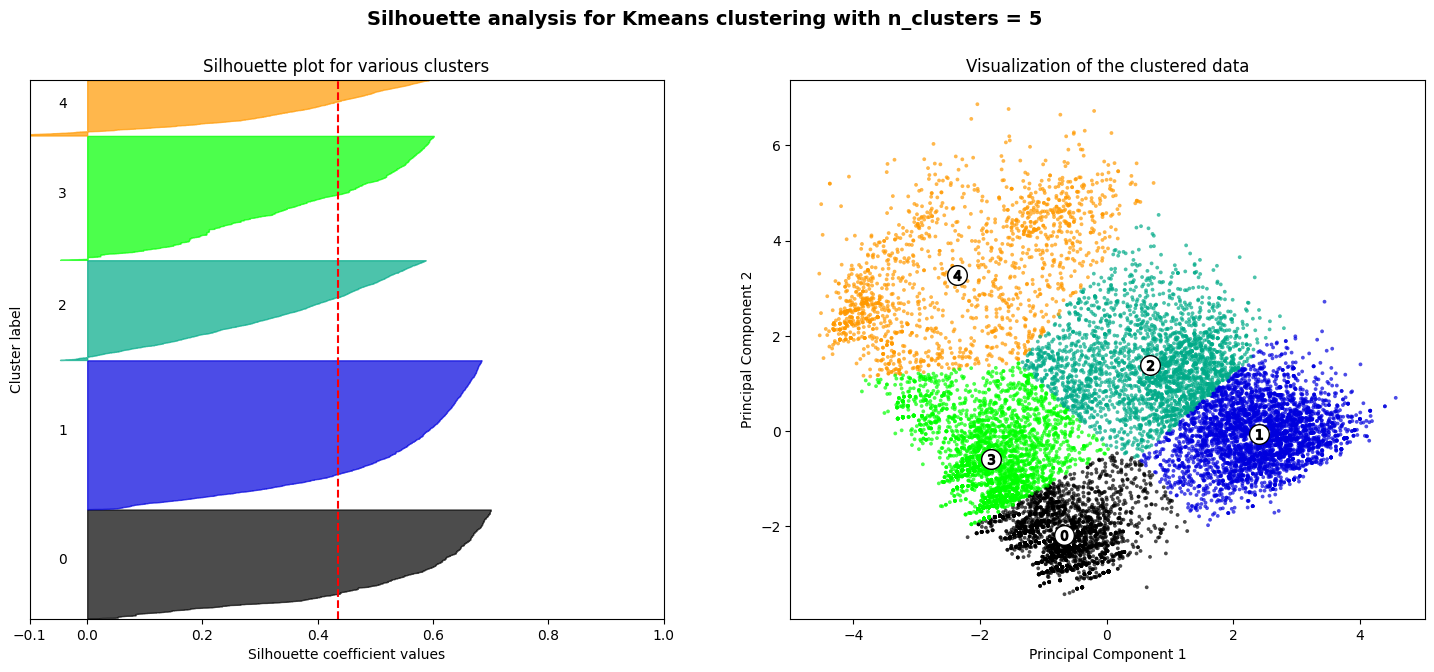

For n_clusters = 6, the average silhouette_score is : 0.444493147858906
KMeans Calinski-Harabasz score: 19371.72377925583
KMeans Davies-Bouldin score: 0.7881653582548583
KMeans Homogeneity score: 0.013341618544589796
KMeans Completeness score: 0.011705718447756627
KMeans V-measure score: 0.012470246267541951
KMeans FMI score: 0.22819487092710047


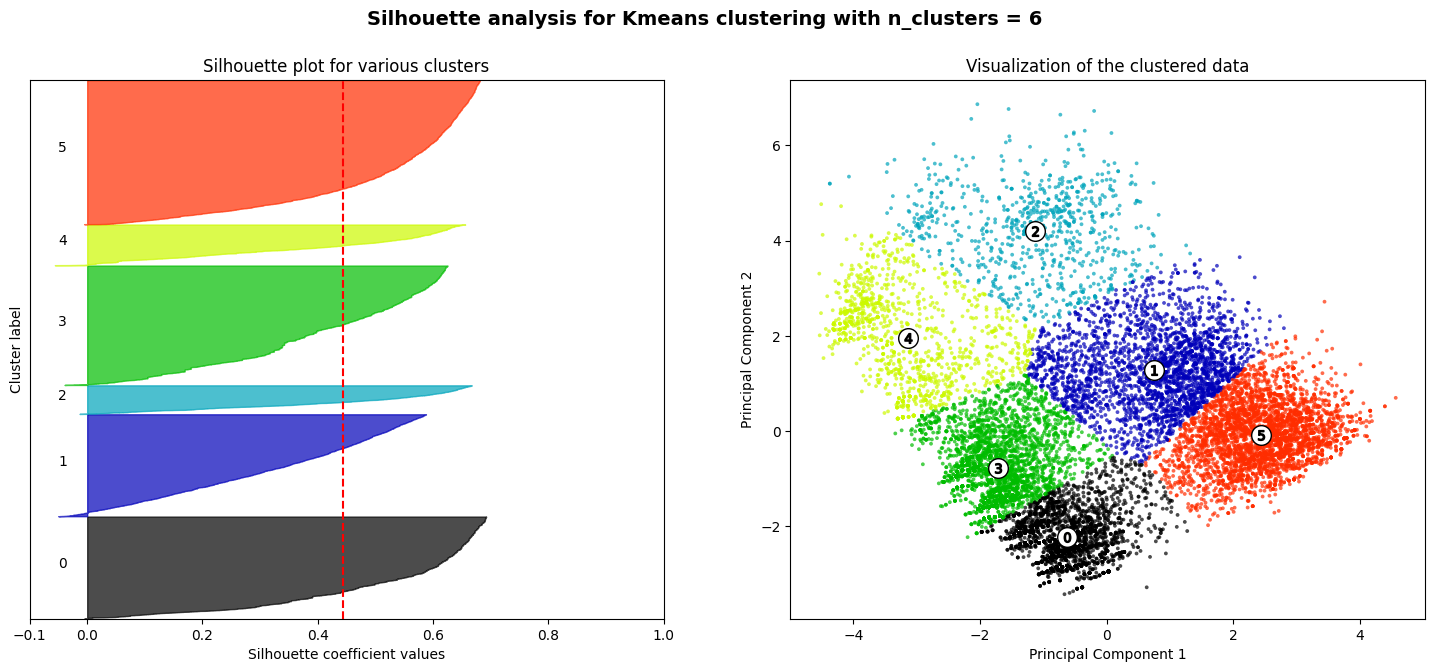

In [498]:
cluster_analysis(x_continuous, range_n_clusters, y=y)

- **Internal Metrics**:
  - **Silhouette Score**: Peaks at 3 clusters, suggesting the optimal separation at this cluster number.
  - **Calinski-Harabasz Score**: Highest at 6 clusters, indicating compact and well-separated groups.
  - **Davies-Bouldin Score**: Generally improves with more clusters, reflecting better compactness.

- **External Metrics**:
  - Homogeneity, completeness and V-measure scores are consistently low across all cluster numbers, indicating poor alignment with true labels.
  - Cluster quality in terms of ground truth remains a challenge, even as internal metrics show improvement.

---

For n_clusters = 2, the average silhouette_score is : 0.456493235930269
KMeans Calinski-Harabasz score: 14030.960719964145
KMeans Davies-Bouldin score: 0.9333072327985077
KMeans Homogeneity score: 0.007183528065780399
KMeans Completeness score: 0.015196275132383492
KMeans V-measure score: 0.009755480684276403
KMeans FMI score: 0.3529706837121416


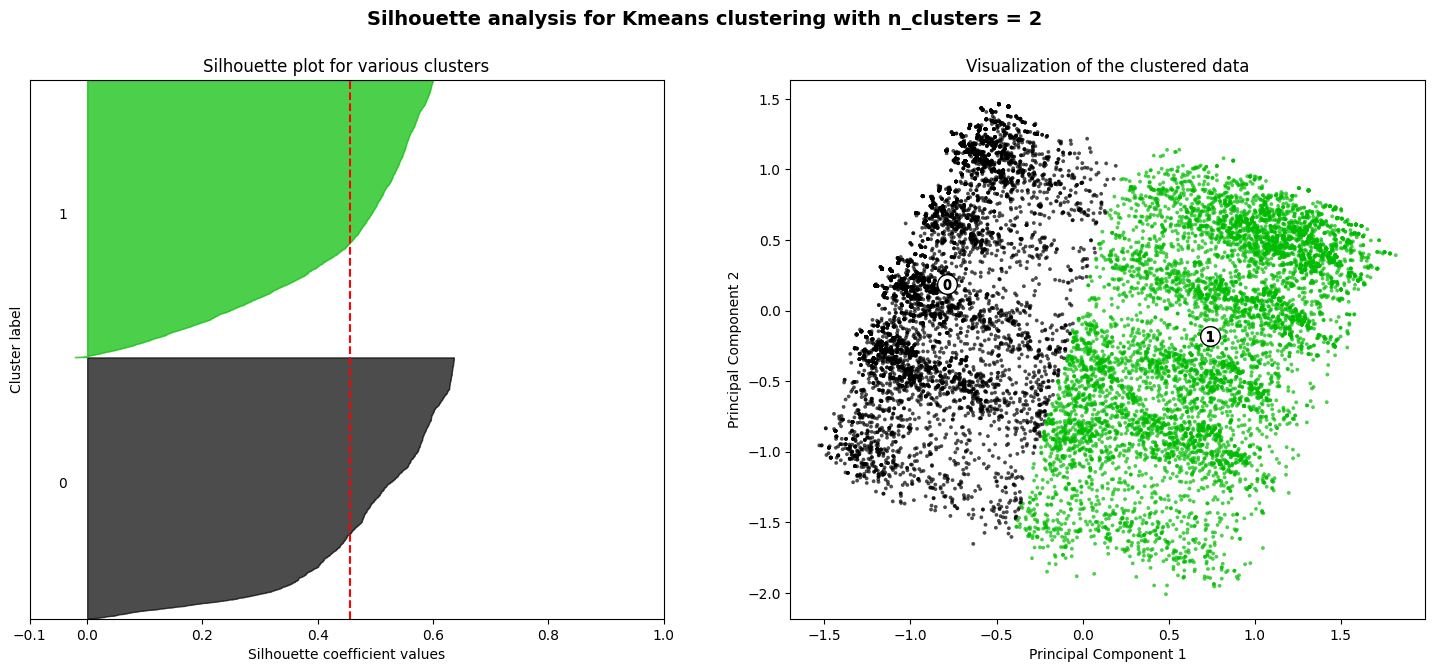

For n_clusters = 3, the average silhouette_score is : 0.43822659283839166
KMeans Calinski-Harabasz score: 15067.400589872896
KMeans Davies-Bouldin score: 0.8413639904724585
KMeans Homogeneity score: 0.00811685740286668
KMeans Completeness score: 0.010852300901367457
KMeans V-measure score: 0.009287347123856225
KMeans FMI score: 0.2902279590958912


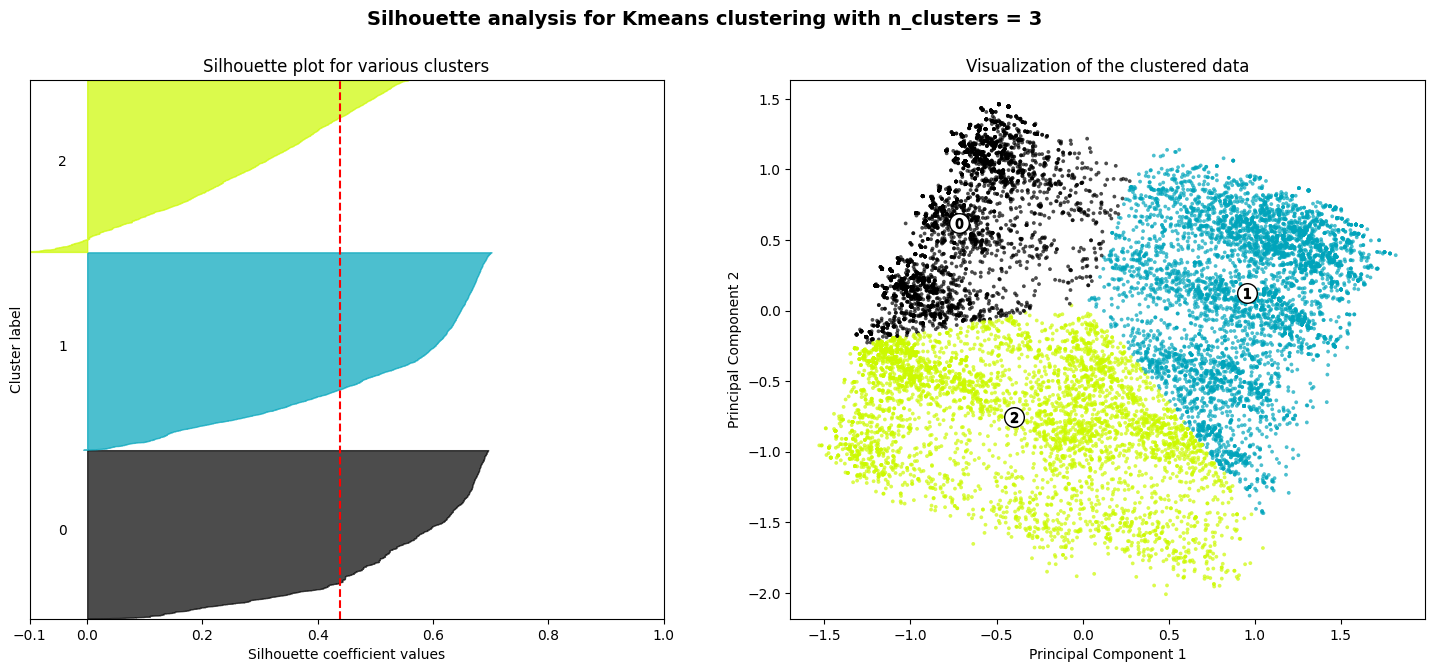

For n_clusters = 4, the average silhouette_score is : 0.502871396844626
KMeans Calinski-Harabasz score: 21767.439355709048
KMeans Davies-Bouldin score: 0.6742289245121841
KMeans Homogeneity score: 0.013621000788611306
KMeans Completeness score: 0.014494703736144934
KMeans V-measure score: 0.014044276987395115
KMeans FMI score: 0.2568440500808229


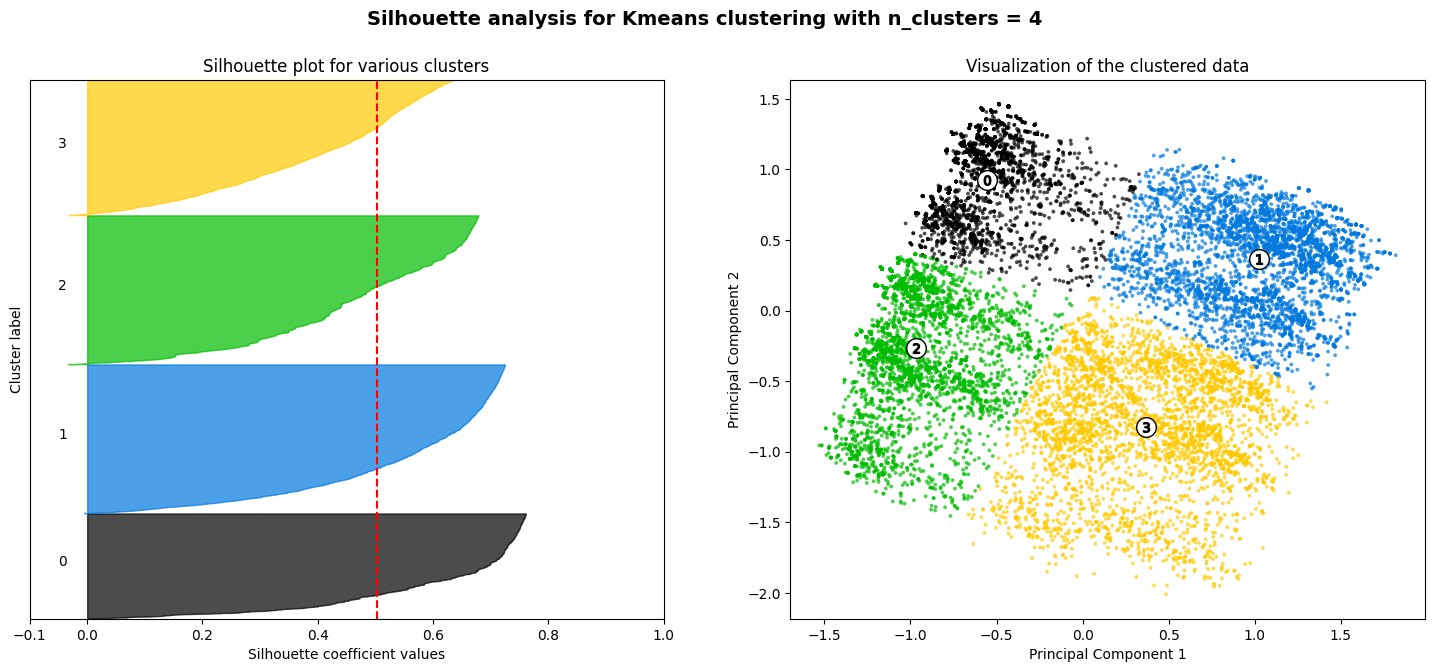

For n_clusters = 5, the average silhouette_score is : 0.4648562769632931
KMeans Calinski-Harabasz score: 19968.589353554653
KMeans Davies-Bouldin score: 0.8386264872724711
KMeans Homogeneity score: 0.016891801622457417
KMeans Completeness score: 0.015731032930699156
KMeans V-measure score: 0.016290766343355873
KMeans FMI score: 0.23858634066823634


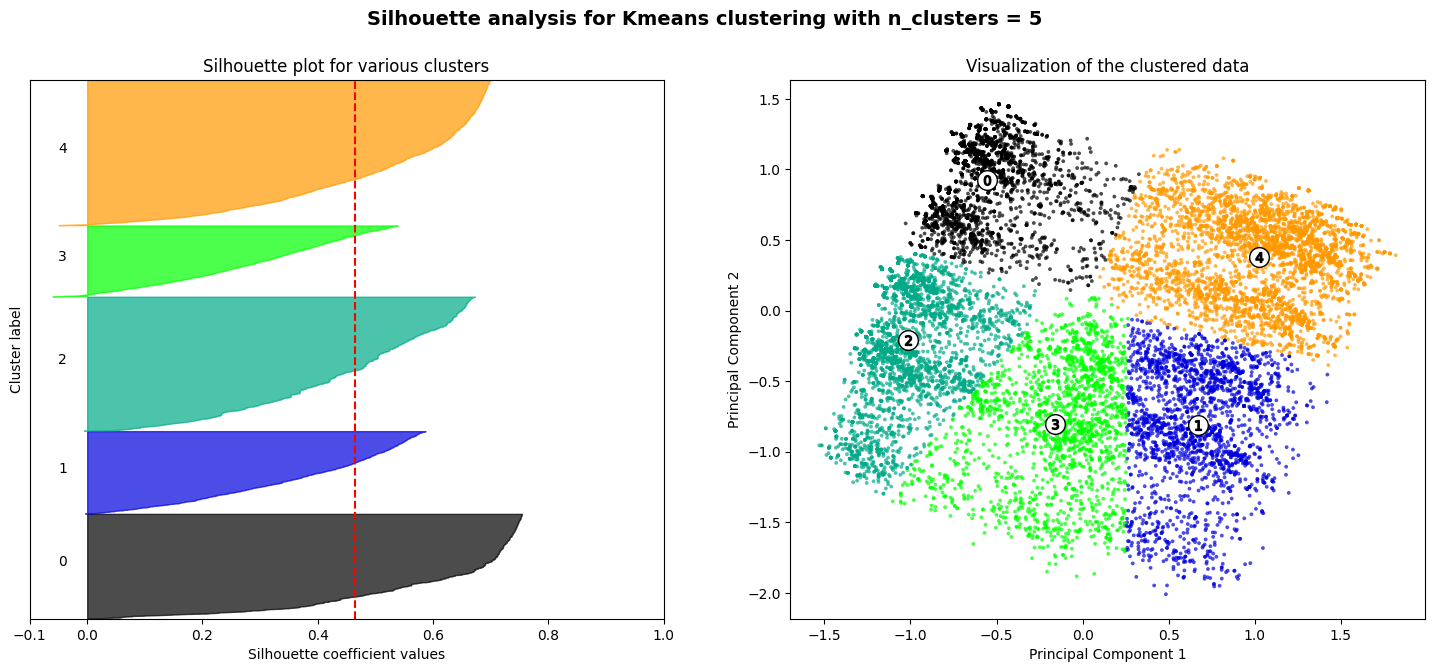

For n_clusters = 6, the average silhouette_score is : 0.4391964729554393
KMeans Calinski-Harabasz score: 19448.910316738362
KMeans Davies-Bouldin score: 0.8549471084831284
KMeans Homogeneity score: 0.020820110913165078
KMeans Completeness score: 0.017367839433655344
KMeans V-measure score: 0.018937928851730255
KMeans FMI score: 0.21784674636636236


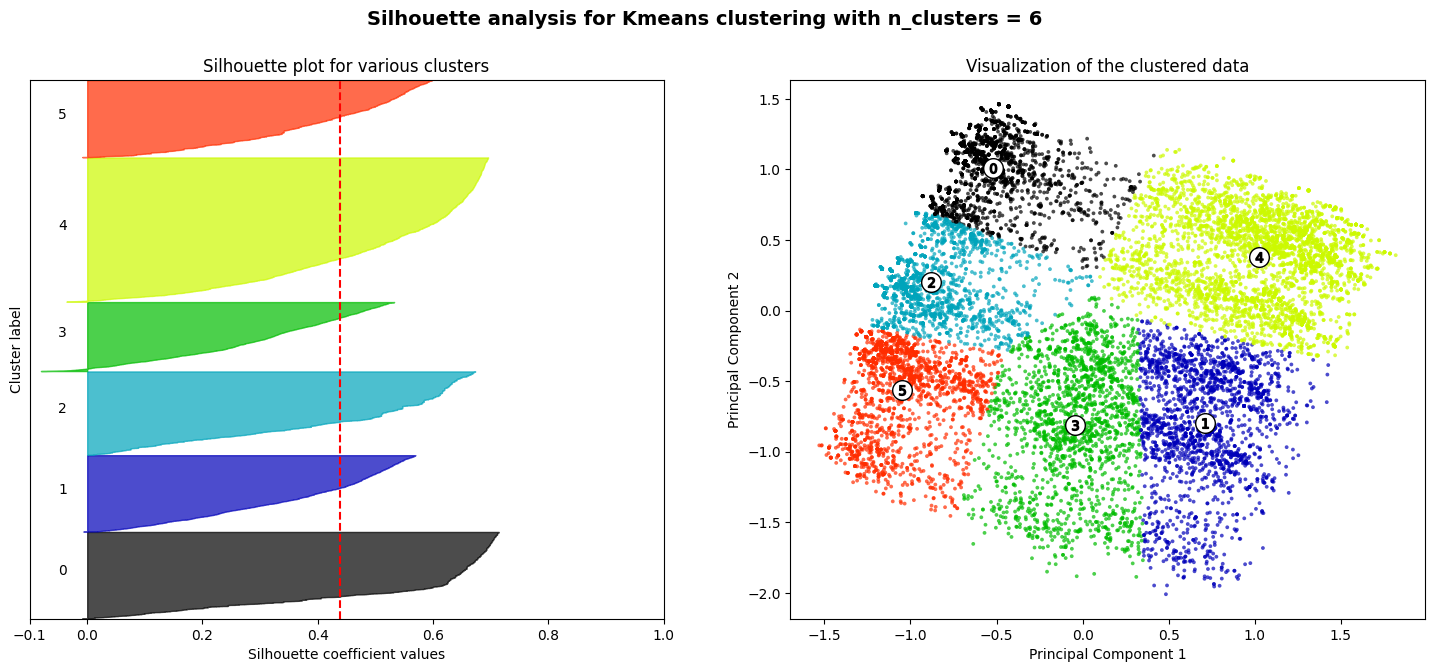

In [497]:
cluster_analysis(x_categorical, range_n_clusters, y=y)

- **Internal Metrics**:
  - **Silhouette Score**: Peaks at 4 clusters, suggesting optimal cluster separation for categorical features.
  - **Calinski-Harabasz Score**: Highest at 4 clusters, indicating compact and well-separated groups.
  - **Davies-Bouldin Score**: Lowest for 4 clusters, reflecting best compactness.

- **External Metrics**:
  - Homogeneity, Completeness, and V-measure scores are consistently low but improve marginally as the number of clusters increases.
  - Clustering quality in relation to ground truth remains limited, highlighting challenges with categorical feature representation.


## 2.3. Clustering - Final Discussion and Conclusions

#### **1. Normal Features Analysis**
- **Silhouette Score**: The highest silhouette score (0.5056) is observed at 3 clusters, indicating that this configuration achieves the best separation between clusters. However, the score decreases as the number of clusters increases.
- **Calinski-Harabasz Score**: The score peaks at 3 clusters (17504.03), reflecting better cluster compactness and separation. The performance deteriorates beyond 4 clusters.
- **Davies-Bouldin Score**: The lowest score (0.7234) is achieved at 3 clusters, indicating the best compactness and minimal overlap.
- **External Metrics**:
  - Homogeneity, Completeness, and V-measure remain low across all configurations, indicating limited alignment with ground truth.
  - The FMI score is highest for 2 clusters (0.3526), but it steadily decreases with more clusters, reflecting reduced alignment with true labels.

**Conclusion**: Based on both internal and external metrics, 3 clusters provide the best balance between separation and compactness.


#### **2. Continuous Features Analysis**
- **Silhouette Score**: The maximum score (0.5308) is achieved at 3 clusters, suggesting the best separation among clusters.
- **Calinski-Harabasz Score**: The highest score (18912.18) is observed at 3 clusters, reflecting good compactness and separation.
- **Davies-Bouldin Score**: The lowest score (0.7276) is achieved at 3 clusters, indicating the least cluster overlap.
- **External Metrics**:
  - Homogeneity, completeness and V-measure show slight improvements at 5 clusters, but the overall alignment remains low.
  - FMI score peaks at 2 clusters (0.3523) and steadily decreases with additional clusters.

**Conclusion**: Similar to the normal feature set, 3 clusters yield the best clustering performance, as evidenced by higher silhouette and Calinski-Harabasz scores.



#### **3. Categorical Features Analysis**
- **Silhouette Score**: The highest silhouette score (0.5029) occurs at 4 clusters, suggesting that this configuration best separates categorical features.
- **Calinski-Harabasz Score**: The score peaks at 4 clusters (21767.44), reflecting good compactness and separation.
- **Davies-Bouldin Score**: The lowest score (0.6742) is achieved at 4 clusters, indicating better-defined clusters.
- **External Metrics**:
  - Homogeneity and Completeness scores are highest for 6 clusters, but the overall performance remains low.
  - FMI score peaks at 2 clusters (0.3530) and decreases with more clusters, indicating reduced alignment with ground truth.

**Conclusion**: For categorical features, 4 clusters deliver the best performance, as evidenced by strong internal metrics.


#### **Final Observations**
   - **Normal and Continuous Features**: 3 clusters provide the best clustering performance based on internal and external metrics.
   - **Categorical Features**: 4 clusters are optimal, as internal metrics show stronger performance.


## 3. Final Comments and Conclusions

1. **Model Performance**:
   - **Binary Classification**: Gradient Boosting performs best, followed by Naive Bayes and KNN.
   - **Multiclass Classification**: Gradient Boosting significantly outperforms other models.
   - **Subgroup (Cats/Dogs) Predictions**: Naive Bayes and Gradient Boosting deliver better results.

2. **Clustering**:
   - Categorical features yield better clustering performance with 4 clusters, while 3 clusters are optimal for normal and continuous features.
   - External metrics remain low, suggesting room for improvement.

#### Conclusion final:
- A better preprocessing approach might have yielded more optimal results, but this is the best that I could achieved. Nonetheless, it is evident that the Gradient Boosting classifier provided the best results in supervised learning. Regarding clustering, the most optimal configurations are 3 and 4 clusters.